<a href="https://www.kaggle.com/code/m000sey/ps-3-23-predicting-software-defects?scriptVersionId=153206108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

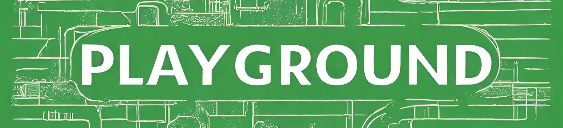

<a id="table"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Table of contents</span>

[Preface](#1)

[Data Exploration](#2)

[Prepare the models](#3)

[Run the models](#4)

[Submission form](#5)

[Next steps](#6)

<a id="1"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Preface</span>
- This is my first shot at using this dataset
- There's bare minimum EDA, I will come back to add more

In [1]:
### Import libraries and select file path
import pandas as pd
import platform

if platform.system() == "Windows":
    train_path = 'C:/Users/COMMANDCENTER/Desktop/coding/software_defects/train.csv'
    test_path = 'C:/Users/COMMANDCENTER/Desktop/coding/software_defects/test.csv'
    sample_path = 'C:/Users/COMMANDCENTER/Desktop/coding/software_defects/sample_submission.csv'
    print("Using Windows file path...")
elif platform.system() == "Darwin":
    train_path = '/Users/shane/Documents/data_science/train.csv'
    test_path = '/Users/shane/Documents/data_science/test.csv'
    print("Using Mac file path...")
elif platform.system() == "Linux":
    train_path = '/kaggle/input/playground-series-s3e23/train.csv'
    test_path = '/kaggle/input/playground-series-s3e23/test.csv'
    sample_path = '/kaggle/input/playground-series-s3e23/sample_submission.csv'
    print("Using Linux file path...")
else:
    raise OSError("Unsupported operating system")

train = pd.read_csv(train_path, index_col='id')
test = pd.read_csv(test_path, index_col='id')
sample = pd.read_csv(sample_path)\

X = train.iloc[:, :-1]
y = train['defects'].map({False: 0, True: 1})
train['defects'] = train['defects'].map({False: 0, True: 1})

print("Data added...")

Using Linux file path...
Data added...


<a id="2"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Data expoloration</span>

In [2]:
# Print the total number of NaN values
print("Pre-feature TRAIN engineering NaN Values:", train.isna().sum().sum())
print("Pre-feature TEST engineering NaN Values:", test.isna().sum().sum())

Pre-feature TRAIN engineering NaN Values: 0
Pre-feature TEST engineering NaN Values: 0


In [3]:
# summary table function

pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    # This function was used from this beautiful notebook: https://www.kaggle.com/code/kimtaehun/complete-eda-and-baseline-code-in-5-minutes
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

- I took this from @DATAMANYO's notebook and you can find their beautiful notebook [here](https://www.kaggle.com/code/kimtaehun/complete-eda-and-baseline-code-in-5-minutes). One day when I understand HTML and CSS I might make my own theme like this

In [4]:
summary(train).style.background_gradient(cmap='Greens')

data shape: (101763, 22)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
loc,float64,0,0.000000,378,1.000000,3442.000000,37.347160,54.600401,22.000000,14.000000,11.000000
v(g),float64,0,0.000000,106,1.000000,404.000000,5.492684,7.900855,3.000000,2.000000,2.000000
ev(g),float64,0,0.000000,71,1.000000,165.000000,2.845022,4.631262,1.000000,1.000000,1.000000
iv(g),float64,0,0.000000,84,1.000000,402.000000,3.498826,5.534541,2.000000,2.000000,2.000000
n,float64,0,0.000000,836,0.000000,8441.000000,96.655995,171.147191,60.000000,32.000000,45.000000
v,float64,0,0.000000,4515,0.000000,80843.080000,538.280956,1270.791601,278.630000,151.270000,197.650000
l,float64,0,0.000000,55,0.000000,1.000000,0.111634,0.100096,0.060000,0.140000,0.110000
d,float64,0,0.000000,3360,0.000000,418.200000,13.681881,14.121306,19.560000,7.000000,8.050000
i,float64,0,0.000000,5171,0.000000,569.780000,27.573007,22.856742,14.250000,21.110000,22.760000
e,float64,0,0.000000,8729,0.000000,16846621.120000,20853.589876,190571.405427,5448.790000,936.710000,1754.010000


- There're no NaN values in the training or testing set, but I doubt Kaggle wouldn't make us impute... Let's investigate further.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# corr_mat = train.corr()
# data_mask = np.triu(np.ones_like(corr_mat, dtype=bool))  # Mask will hide the top part of the matrix
# cmap = sns.diverging_palette(100, 7, s=75, l=40, n=20, center='light', as_cmap=True)
# reversed_cmap = cmap.reversed()
# f, ax = plt.subplots(figsize=(15, 10))
# sns.heatmap(corr_mat, annot=True, cmap=reversed_cmap, fmt='.2f', center=0,
            # annot_kws={'size': 12}, mask=data_mask).set_title('Correlation Feature Heatmap')
# plt.tight_layout()
# plt.show()

- Hmm seems like there's lots of strong correlation here
- The l column is the only green column here

In [6]:
# Mutual information 

from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

def make_mi_scores(X, y):
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    bar_color = 'darkseagreen'
    plt.figure(figsize=(8, 6), dpi=100)  # Adjust width, height, and dpi as needed
    plt.barh(width, scores, color=bar_color)
    plt.title("Mutual Information Scores", fontsize=14)  # Adjust font size as needed
    plt.xticks(fontsize=12)  # Adjust font size as needed
    plt.yticks(width, ticks, fontname='Arial', fontsize=12)  # Adjust font size as needed
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
# mi_scores = make_mi_scores(X, y)
# print(mi_scores)

# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores.head(20))

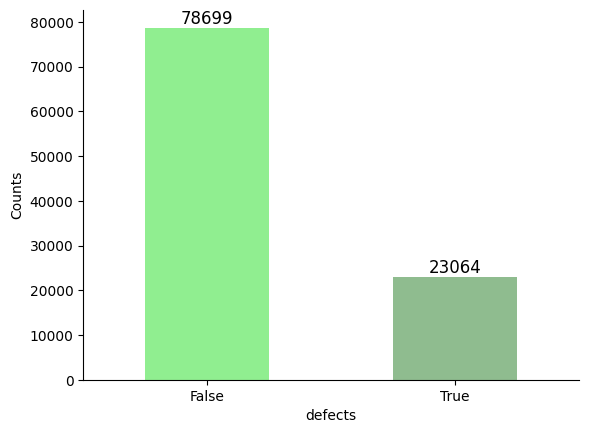

In [7]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Arial'
value_counts = train['defects'].value_counts()

ax = value_counts.plot(kind='bar', color=['#90EE90', 'darkseagreen'])
ax.set_facecolor('none')  # Set the background color to none
ax.grid(False)  # Turn off grid lines
ax.set_xticklabels(['False', 'True'], rotation=0)
plt.ylabel('Counts')
for i, v in enumerate(value_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12, color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.show()

<a id="3"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Prepare the models</span>

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns  # Import seaborn as 'sns' for consistency

# XGB = XGBClassifier(n_estimators=1000)
# XGB.fit(X, train['defects'])
# feature_imp = pd.Series(XGB.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define a custom color palette
# num_colors = len(feature_imp)
# custom_palette = sns.color_palette("Greens", n_colors=num_colors)  # You can choose a different color palette if you like

# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_imp, y=feature_imp.index, palette=custom_palette)  # Use the custom color palette
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.tight_layout()
# plt.show()

<a id="4"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Baseline models</span>
- I took the ensembling method from @pjmathematician in this [notebook](https://www.kaggle.com/code/pjmathematician/sdbc-xgb-lgb-cat-early-stopping-baseline)
- This is my first time using ensemble of boosts and I was having too much difficulty writing my own code for it.
- This was my first time using StratifiedKFold and StratifiedKFold for splitting. Before this, I've only used sklearn's train_test_split.
- ChatGPT says: "Stratified K-Fold is a variation of K-Fold cross-validation where it ensures that the class distribution in each fold is similar to the original dataset. This is particularly useful when dealing with **imbalanced datasets**, where some classes have significantly fewer samples than others. Stratified K-Fold helps in ensuring that each fold represents the class distribution well."
- folds=5 means that you're using 5-fold cross-validation, where the dataset is split into 5 subsets (folds).

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import roc_auc_score

folds=5
n=1000
rounds=10
skf = StratifiedKFold(folds)
test_preds = []

for (tr, te) in skf.split(train, train['defects']):
# I used this function that's slightly modified from https://www.kaggle.com/code/pjmathematician/sdbc-xgb-lgb-cat-early-stopping-baseline
    trr = train.iloc[tr, 1:]
    tee = train.iloc[te, 1:]
    
    Cat = CatBoostClassifier(loss_function='CrossEntropy', 
                             n_estimators=n,
                             random_seed=42,
                             learning_rate=0.04,
                             max_depth=10,
                            )
    Cat.fit(trr.iloc[:,:-1], trr.iloc[:,-1],
            eval_set = (tee.iloc[:,:-1], tee.iloc[:,-1]),
            early_stopping_rounds=rounds,
            verbose = 500)
    
    LGBM = LGBMClassifier(n_estimators=n,
                          learning_rate=0.095,
                          max_depth=10, 
                          num_leaves=25,)
    LGBM.fit(trr.iloc[:,:-1], trr.iloc[:,-1], 
             eval_set = [(tee.iloc[:,:-1], tee.iloc[:,-1])], 
             callbacks = [lgbm.early_stopping(stopping_rounds=10, verbose=True)])
    
    XGB = XGBClassifier(early_stopping_rounds= rounds, 
                        n_estimators=n,
                        eta=0.04125,
                        objective='binary:logistic',
                        max_depth=10,
                        colsample_bytree=0.5,
                        gamma=1.6,
                        min_child_weight=5,)
    XGB.fit(trr.iloc[:,:-1], trr.iloc[:,-1], 
           eval_set = [(tee.iloc[:,:-1], tee.iloc[:,-1])])
    
    print("______________________________________")
    print("XGB", roc_auc_score(tee.iloc[:,-1], XGB.predict_proba(tee.iloc[:,:-1])[:,1]))
    print("LGB", roc_auc_score(tee.iloc[:,-1], LGBM.predict_proba(tee.iloc[:,:-1])[:,1]))
    print("CAT", roc_auc_score(tee.iloc[:,-1], Cat.predict_proba(tee.iloc[:,:-1])[:,1]))
    ens_score = (XGB.predict_proba(tee.iloc[:,:-1])[:,1] + LGBM.predict_proba(tee.iloc[:,:-1])[:,1] + Cat.predict_proba(tee.iloc[:,:-1])[:,1]) / 3
    print("Ens", roc_auc_score(tee.iloc[:,-1], ens_score))
    test_preds_ = (XGB.predict_proba(test.iloc[:,1:])[:,1] + LGBM.predict_proba(test.iloc[:,1:])[:,1] + Cat.predict_proba(test.iloc[:,1:])[:,1]) / 3
    test_preds.append(test_preds_)
    print()

<a id="4"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Trying different early stops and folds</span>
- ChatGPT told me that for smaller datasets I could use higher folds, but I need to be careful about overfitting

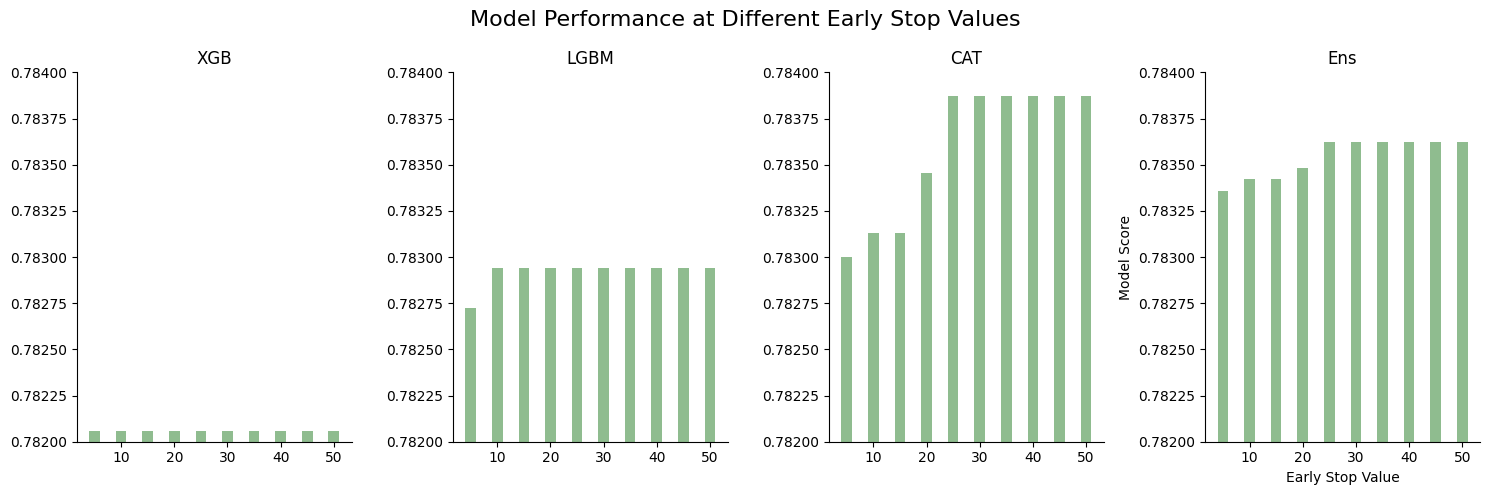

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# early stopping evaluation
early_stop_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
models = ["XGB", "LGBM", "CAT", "Ens"]

baseline_dicts = {
    5: {"XGB": 0.7820595850462682, "LGBM": 0.7827223119280428, "CAT": 0.782999499333004, "Ens": 0.7833590662618364},
    10: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7831275993549113, "Ens": 0.7834218630904645},
    15: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7831275993549113, "Ens": 0.7834218630904645},
    20: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7834558229543671, "Ens": 0.7834798675295391},
    25: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
    30: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
    35: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
    40: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
    45: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
    50: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
}

# Create a subplot for each model
fig, axs = plt.subplots(1, len(models), figsize=(15, 5))


# Set y-axis limits for all subplots
for ax in axs:
    ax.set_ylim(0.782, 0.784)

for i, model in enumerate(models):
    model_scores = [baseline_dicts[early_stop][model] for early_stop in early_stop_values]
    axs[i].bar(early_stop_values, model_scores, color="darkseagreen", width=2)
    axs[i].set_title(model)
    
    # Remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Set font to Arial
for ax in axs:
    for label in ax.get_xticklabels():
        label.set_fontname("Arial")
    ax.xaxis.label.set_fontname("Arial")
    ax.yaxis.label.set_fontname("Arial")
    ax.title.set_fontname("Arial")

# Set labels and title
plt.xlabel("Early Stop Value")
plt.ylabel("Model Score")
fig.suptitle("Model Performance at Different Early Stop Values", fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

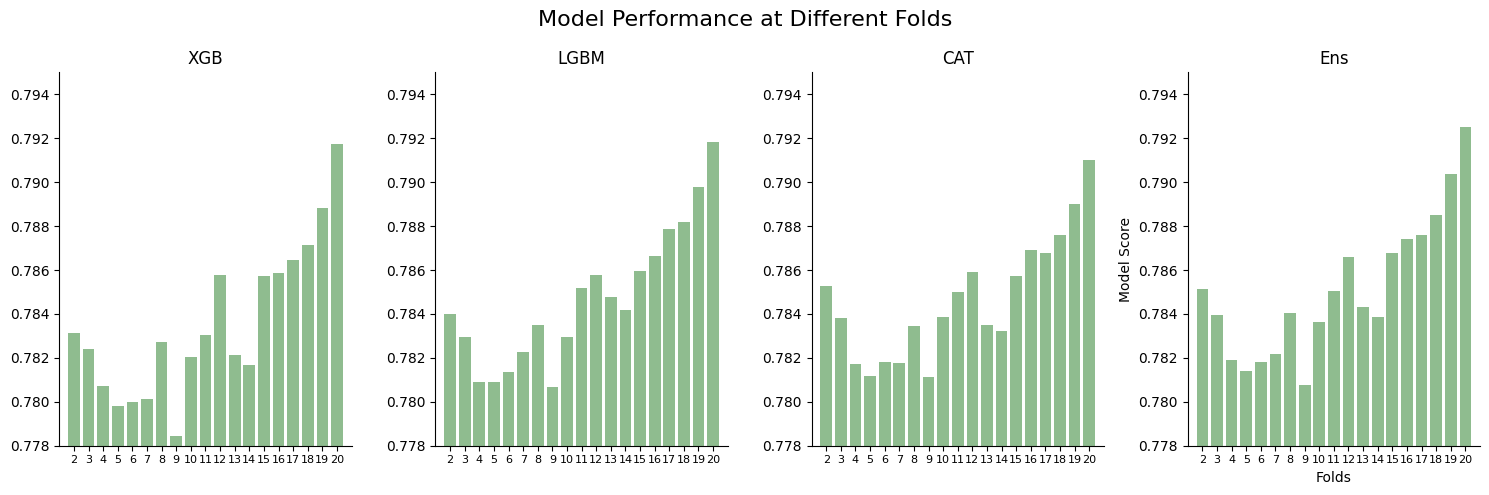

In [10]:
# Fold evalutation
fold_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
models = ["XGB", "LGBM", "CAT", "Ens"]

baseline_dicts = {
    2: {"XGB": 0.7831188986464033, "LGBM": 0.7839940956955124, "CAT": 0.7852787587902937, "Ens": 0.7851232943805244},
    3: {"XGB": 0.7823900909535071, "LGBM": 0.7829641087020015, "CAT": 0.7838270331397018, "Ens": 0.7839450249193641},
    4: {"XGB": 0.7807336677683212, "LGBM": 0.7808876254223764, "CAT": 0.7817002864696636, "Ens": 0.7818939302020789},
    5: {"XGB": 0.7798193837979218, "LGBM": 0.7809129253706342, "CAT": 0.7811662584958982, "Ens": 0.7814189511606432},
    6: {"XGB": 0.7799680645193026, "LGBM": 0.7813542784325187, "CAT": 0.7818164951878999, "Ens": 0.7817985055467598},
    7: {"XGB": 0.7801446936874213, "LGBM": 0.7822702314834437, "CAT": 0.7817874332622706, "Ens": 0.7821837629807363},
    8: {"XGB": 0.7827132026573558, "LGBM": 0.7834812895919758, "CAT": 0.7834447417286086, "Ens": 0.7840405089253832},
    9: {"XGB": 0.7784648004771969, "LGBM": 0.7806698686244784, "CAT": 0.7811364502014916, "Ens": 0.7807805068896917},
    10: {"XGB": 0.7820595850462682, "LGBM": 0.7829397046334641, "CAT": 0.7838741930538665, "Ens": 0.7836230057393546},
    11: {"XGB": 0.783019500547196, "LGBM": 0.7851773217566956, "CAT": 0.784997278351637, "Ens": 0.7850369065650051},
    12: {"XGB": 0.7857944273129641, "LGBM": 0.7857598364263615, "CAT": 0.7858969702508855, "Ens": 0.786614413800304},
    13: {"XGB": 0.7821375296120645, "LGBM": 0.7847623612616923, "CAT": 0.7834947628157215, "Ens": 0.7843094379951913},
    14: {"XGB": 0.781689997836416, "LGBM": 0.7841850325569167, "CAT": 0.783202238288697, "Ens": 0.7838610350400156},
    15: {"XGB": 0.7857207572107698, "LGBM": 0.7859489947632402, "CAT": 0.7857410835526678, "Ens": 0.7867927238636707},
    16: {"XGB": 0.7858505707190152, "LGBM": 0.7866566475214318, "CAT": 0.7869010862753879, "Ens": 0.7874283181767676},
    17: {"XGB": 0.7864619625114999, "LGBM": 0.7878488806828503, "CAT": 0.7867695297643751, "Ens": 0.7876104046244615},
    18: {"XGB": 0.7871337937181682, "LGBM": 0.7881743198681839, "CAT": 0.7875740197538377, "Ens": 0.7884977712831568},
    19: {"XGB": 0.7888404548662624, "LGBM": 0.7897674596347392, "CAT": 0.7890035639178495, "Ens": 0.7903491389553776},
    20: {"XGB": 0.791722432264073, "LGBM": 0.7918268413220213, "CAT": 0.7909890357272819, "Ens": 0.7924890899142611},
}

# Create a subplot for each model
fig, axs = plt.subplots(1, len(models), figsize=(15, 5))

# Set y-axis limits for all subplots
for ax in axs:
    ax.set_ylim(0.778, 0.795)

for i, model in enumerate(models):
    model_scores = [baseline_dicts[fold][model] for fold in fold_values]
    axs[i].bar(fold_values, model_scores, color="darkseagreen")
    axs[i].set_title(model)
    
    # Set x-axis limits and ticks for all subplots
    axs[i].set_xlim(1, 21)
    axs[i].set_xticks(range(2, 21))
    
    # Rotate x-axis labels for better readability
    axs[i].set_xticklabels(range(2, 21), rotation=0, fontsize=8)
    
    # Remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
# Set labels and title
plt.xlabel("Folds")
plt.ylabel("Model Score")
fig.suptitle("Model Performance at Different Folds", fontsize=16)

# Set font to Arial
for ax in axs:
    for label in ax.get_xticklabels():
        label.set_fontname("Arial")
    ax.xaxis.label.set_fontname("Arial")
    ax.yaxis.label.set_fontname("Arial")
    ax.title.set_fontname("Arial")

# Adjust layout
plt.tight_layout()
plt.show()

<a id="5"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Optuna</span>
- I ran optuna offline to get the optuned hyperparameters

In [11]:
# Optuna results
# Best is trial 58 with value: 0.7915776179682729.
best_optuna_params = {'cat_n_estimators': 769, 
                       'cat_learning_rate': 0.10978828350312828, 
                       'cat_max_depth': 12, 
                       'lgbm_n_estimators': 1356, 
                       'lgbm_learning_rate': 0.1255685382073943, 
                       'lgbm_max_depth': 11, 
                       'lgbm_min_child_weight': 9, 
                       'lgbm_num_leaves': 39, 
                       'xgb_n_estimators': 1797, 
                       'xgb_learning_rate': 0.22024885670727753, 
                       'xgb_max_depth': 6, 
                       'xgb_min_child_weight': 3.735172047586422, 
                       'xgb_gamma': 1.2608632617585325, 
                       'xgb_colsample_bytree': 0.5737284440516763}

In [12]:
# submission with new stops and folds

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import roc_auc_score

FOLDS = 12
STOP = 25
SEED = 42
n = 1000
skf = StratifiedKFold(FOLDS)
test_preds = []

for (tr, te) in skf.split(train, train['defects']):
# I used this function that's slightly modified from https://www.kaggle.com/code/pjmathematician/sdbc-xgb-lgb-cat-early-stopping-baseline
    trr = train.iloc[tr, 1:]
    tee = train.iloc[te, 1:]
    
    Cat = CatBoostClassifier(loss_function='CrossEntropy', 
                             n_estimators=n,
                             random_seed=42,
                             learning_rate=0.04,
                             max_depth=10,
                            )
    Cat.fit(trr.iloc[:,:-1], trr.iloc[:,-1],
            eval_set = (tee.iloc[:,:-1], tee.iloc[:,-1]),
            early_stopping_rounds=STOP,
            verbose = 500)
    
    LGBM = LGBMClassifier(n_estimators=n,
                          learning_rate=0.095,
                          max_depth=10, 
                          num_leaves=25,)
    LGBM.fit(trr.iloc[:,:-1], trr.iloc[:,-1], 
             eval_set = [(tee.iloc[:,:-1], tee.iloc[:,-1])], 
             callbacks = [lgbm.early_stopping(stopping_rounds=STOP, verbose=True)])
    
    XGB = XGBClassifier(early_stopping_rounds= STOP, 
                        n_estimators=n,
                        eta=0.04125,
                        objective='binary:logistic',
                        max_depth=10,
                        colsample_bytree=0.5,
                        gamma=1.6,
                        min_child_weight=5,)
    XGB.fit(trr.iloc[:,:-1], trr.iloc[:,-1], 
           eval_set = [(tee.iloc[:,:-1], tee.iloc[:,-1])])
    
    print("______________________________________")
    print("XGB", roc_auc_score(tee.iloc[:,-1], XGB.predict_proba(tee.iloc[:,:-1])[:,1]))
    print("LGB", roc_auc_score(tee.iloc[:,-1], LGBM.predict_proba(tee.iloc[:,:-1])[:,1]))
    print("CAT", roc_auc_score(tee.iloc[:,-1], Cat.predict_proba(tee.iloc[:,:-1])[:,1]))
    ens_score = (XGB.predict_proba(tee.iloc[:,:-1])[:,1] + LGBM.predict_proba(tee.iloc[:,:-1])[:,1] + Cat.predict_proba(tee.iloc[:,:-1])[:,1]) / 3
    print("Ens", roc_auc_score(tee.iloc[:,-1], ens_score))
    test_preds_ = (XGB.predict_proba(test.iloc[:,1:])[:,1] + LGBM.predict_proba(test.iloc[:,1:])[:,1] + Cat.predict_proba(test.iloc[:,1:])[:,1]) / 3
    test_preds.append(test_preds_)
    print()

0:	learn: 0.6708665	test: 0.6707644	best: 0.6707644 (0)	total: 139ms	remaining: 2m 18s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4316658106
bestIteration = 139

Shrink model to first 140 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.432242
[0]	validation_0-logloss:0.67538
[1]	validation_0-logloss:0.65872
[2]	validation_0-logloss:0.64341
[3]	validation_0-logloss:0.62942
[4]	validation_0-logloss:0.61631
[5]	validation_0-logloss:0.60417
[6]	validation_0-logloss:0.59301
[7]	validation_0-logloss:0.58264
[8]	validation_0-logloss:0.57283
[9]	validation_0-logloss:0.56378
[10]	validation_0-logloss:0.55530
[11]	validation_0-logloss:0.54734
[12]	validation_0-logloss:0.53990
[13]	validation_0-logloss:0.53313
[14]	validation_0-logloss:0.52680
[15]	validation_0-logloss:0.52091
[16]	validation_0-logloss:0.51526
[17]	validation_0-logloss:0.51009
[18]	validation_0-logloss:0.50525
[19

In [13]:
import optuna
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import roc_auc_score

FOLDS = 10
STOP = 25
SEED = 42
skf = StratifiedKFold(FOLDS)
test_preds = []

def objective(trial):
    cat_params = {
        'n_estimators': trial.suggest_int('cat_n_estimators', 500, 2000),
        "learning_rate": trial.suggest_float("cat_learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("cat_max_depth", 4, 12),
        'loss_function': 'CrossEntropy',
        'random_seed': SEED
    }

    lgbm_params = {
        'n_estimators': trial.suggest_int('lgbm_n_estimators', 500, 2000),
        "learning_rate": trial.suggest_float("lgbm_learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("lgbm_max_depth", 4, 12),
        "min_child_weight": trial.suggest_int("lgbm_min_child_weight", 1, 10),
        "num_leaves": trial.suggest_int("lgbm_num_leaves", 20, 50),
        'objective': 'binary',
        'random_seed': SEED
    }

    xgb_params = {
        'n_estimators': trial.suggest_int('xgb_n_estimators', 500, 2000),
        "learning_rate": trial.suggest_float("xgb_learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("xgb_max_depth", 4, 12),
        "min_child_weight": trial.suggest_float("xgb_min_child_weight", 1, 10),
        "gamma": trial.suggest_float("xgb_gamma", 0, 10),
        "colsample_bytree": trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0),
        'random_seed': SEED
    }

    for (tr, te) in skf.split(train, train['defects']):
        trr = train.iloc[tr, 1:]
        tee = train.iloc[te, 1:]

        Cat = CatBoostClassifier(**cat_params)
        Cat.fit(trr.iloc[:, :-1], trr.iloc[:, -1],
                eval_set=(tee.iloc[:, :-1], tee.iloc[:, -1]),
                early_stopping_rounds=STOP,
                verbose=500)

        LGBM = LGBMClassifier(**lgbm_params)
        LGBM.fit(trr.iloc[:, :-1], trr.iloc[:, -1],
                 eval_set=[(tee.iloc[:, :-1], tee.iloc[:, -1])],
                 callbacks=[lgbm.early_stopping(stopping_rounds=STOP, verbose=True)])

        XGB = XGBClassifier(early_stopping_rounds=STOP, **xgb_params)
        XGB.fit(trr.iloc[:, :-1], trr.iloc[:, -1],
                eval_set=[(tee.iloc[:, :-1], tee.iloc[:, -1])])

        ens_score = (XGB.predict_proba(tee.iloc[:, :-1])[:, 1] + LGBM.predict_proba(tee.iloc[:, :-1])[:, 1] + Cat.predict_proba(tee.iloc[:, :-1])[:, 1]) / 3
        auc = roc_auc_score(tee.iloc[:, -1], ens_score)

        return auc

# Create a study to optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2023-12-01 18:04:48,101] A new study created in memory with name: no-name-e9dddfb5-bb57-49cb-86f4-d3f2b2f3f2b5


0:	learn: 0.5658675	test: 0.5655287	best: 0.5655287 (0)	total: 184ms	remaining: 4m 56s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4340786777
bestIteration = 22

Shrink model to first 23 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[87]	valid_0's binary_logloss: 0.433507
[18:04:57] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66238
[1]	validation_0-logloss:0.63563
[2]	validation_0-logloss:0.61250
[3]	validation_0-logloss:0.59230
[4]	validation_0-logloss:0.57447
[5]	validation_0-logloss:0.55865
[6]	validation_0-logloss:0.54472
[7]	validation_0-logloss:0.53241
[8]	validation_0-logloss:0.52157
[9]	validation_0-logloss:0.51180
[10]	validation_0-logloss:0.50322
[11]	validation_0-logloss:0.49562
[12]	validation_0-logloss:0.48883
[13]	validation_0-logloss:0.48271
[14]	validation_0-logloss:0.47731
[15]	validation_0-logloss:0.47248
[16]	validation_0-

[I 2023-12-01 18:05:18,818] Trial 0 finished with value: 0.7903180145064272 and parameters: {'cat_n_estimators': 1613, 'cat_learning_rate': 0.2655109038524356, 'cat_max_depth': 12, 'lgbm_n_estimators': 544, 'lgbm_learning_rate': 0.04983357962926903, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 6, 'lgbm_num_leaves': 21, 'xgb_n_estimators': 1717, 'xgb_learning_rate': 0.07173308088076827, 'xgb_max_depth': 8, 'xgb_min_child_weight': 3.0157400267987216, 'xgb_gamma': 7.083039823135372, 'xgb_colsample_bytree': 0.9148602981563494}. Best is trial 0 with value: 0.7903180145064272.


0:	learn: 0.6838491	test: 0.6838138	best: 0.6838138 (0)	total: 19.9ms	remaining: 22.8s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4323489712
bestIteration = 447

Shrink model to first 448 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[168]	valid_0's binary_logloss: 0.433286
[18:05:30] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68662
[1]	validation_0-logloss:0.68023
[2]	validation_0-logloss:0.67403
[3]	validation_0-logloss:0.66807
[4]	validation_0-logloss:0.66225
[5]	validation_0-logloss:0.65656
[6]	validation_0-logloss:0.65107
[7]	validation_0-logloss:0.64570
[8]	validation_0-logloss:0.64049
[9]	validation_0-logloss:0.63541
[10]	validation_0-logloss:0.63047
[11]	validation_0-logloss:0.62562
[12]	validation_0-logloss:0.62095
[13]	validation_0-logloss:0.61639
[14]	validation_0-logloss:0.61197
[15]	validation_0-logloss:0.60768
[16]	validation

[I 2023-12-01 18:06:19,574] Trial 1 finished with value: 0.7905306979641542 and parameters: {'cat_n_estimators': 1143, 'cat_learning_rate': 0.016601853409561447, 'cat_max_depth': 6, 'lgbm_n_estimators': 1606, 'lgbm_learning_rate': 0.028306705172327258, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 40, 'xgb_n_estimators': 911, 'xgb_learning_rate': 0.014947797458345773, 'xgb_max_depth': 6, 'xgb_min_child_weight': 1.3032702765382478, 'xgb_gamma': 6.085094912426446, 'xgb_colsample_bytree': 0.560120116423072}. Best is trial 1 with value: 0.7905306979641542.


0:	learn: 0.6278844	test: 0.6275026	best: 0.6275026 (0)	total: 66.1ms	remaining: 1m 1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4331432467
bestIteration = 36

Shrink model to first 37 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[70]	valid_0's binary_logloss: 0.433493
[18:06:25] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66189
[1]	validation_0-logloss:0.63466
[2]	validation_0-logloss:0.61103
[3]	validation_0-logloss:0.59067
[4]	validation_0-logloss:0.57273
[5]	validation_0-logloss:0.55685
[6]	validation_0-logloss:0.54297
[7]	validation_0-logloss:0.53074
[8]	validation_0-logloss:0.51988
[9]	validation_0-logloss:0.51032
[10]	validation_0-logloss:0.50171
[11]	validation_0-logloss:0.49407
[12]	validation_0-logloss:0.48734
[13]	validation_0-logloss:0.48127
[14]	validation_0-logloss:0.47585
[15]	validation_0-logloss:0.47123
[16]	validation_0-

[I 2023-12-01 18:06:39,627] Trial 2 finished with value: 0.7903130850309731 and parameters: {'cat_n_estimators': 924, 'cat_learning_rate': 0.124552562514083, 'cat_max_depth': 10, 'lgbm_n_estimators': 913, 'lgbm_learning_rate': 0.07162192823140713, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 30, 'xgb_n_estimators': 631, 'xgb_learning_rate': 0.07368082456616118, 'xgb_max_depth': 7, 'xgb_min_child_weight': 8.973346274209518, 'xgb_gamma': 9.206791390874617, 'xgb_colsample_bytree': 0.6363972210421489}. Best is trial 1 with value: 0.7905306979641542.


0:	learn: 0.5632651	test: 0.5622622	best: 0.5622622 (0)	total: 27.8ms	remaining: 33.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4333354777
bestIteration = 23

Shrink model to first 24 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[112]	valid_0's binary_logloss: 0.432859
[18:06:43] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68540
[1]	validation_0-logloss:0.67786
[2]	validation_0-logloss:0.67057
[3]	validation_0-logloss:0.66358
[4]	validation_0-logloss:0.65679
[5]	validation_0-logloss:0.65021
[6]	validation_0-logloss:0.64382
[7]	validation_0-logloss:0.63766
[8]	validation_0-logloss:0.63171
[9]	validation_0-logloss:0.62596
[10]	validation_0-logloss:0.62037
[11]	validation_0-logloss:0.61494
[12]	validation_0-logloss:0.60972
[13]	validation_0-logloss:0.60465
[14]	validation_0-logloss:0.59973
[15]	validation_0-logloss:0.59501
[16]	validation_0

[I 2023-12-01 18:07:50,708] Trial 3 finished with value: 0.790617005093057 and parameters: {'cat_n_estimators': 1201, 'cat_learning_rate': 0.2798605895524601, 'cat_max_depth': 8, 'lgbm_n_estimators': 542, 'lgbm_learning_rate': 0.046039828551835374, 'lgbm_max_depth': 5, 'lgbm_min_child_weight': 5, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 852, 'xgb_learning_rate': 0.01775091008197744, 'xgb_max_depth': 7, 'xgb_min_child_weight': 1.0127894239728419, 'xgb_gamma': 9.130904775436798, 'xgb_colsample_bytree': 0.8198059460482539}. Best is trial 3 with value: 0.790617005093057.


0:	learn: 0.6743098	test: 0.6741942	best: 0.6741942 (0)	total: 18.8ms	remaining: 23.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.432372602
bestIteration = 291

Shrink model to first 292 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[152]	valid_0's binary_logloss: 0.433042
[18:07:59] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67450
[1]	validation_0-logloss:0.65720
[2]	validation_0-logloss:0.64135
[3]	validation_0-logloss:0.62695
[4]	validation_0-logloss:0.61353
[5]	validation_0-logloss:0.60104
[6]	validation_0-logloss:0.58960
[7]	validation_0-logloss:0.57894
[8]	validation_0-logloss:0.56906
[9]	validation_0-logloss:0.55988
[10]	validation_0-logloss:0.55128
[11]	validation_0-logloss:0.54325
[12]	validation_0-logloss:0.53584
[13]	validation_0-logloss:0.52890
[14]	validation_0-logloss:0.52252
[15]	validation_0-logloss:0.51663
[16]	validation_

[I 2023-12-01 18:08:29,709] Trial 4 finished with value: 0.7907735365929559 and parameters: {'cat_n_estimators': 1263, 'cat_learning_rate': 0.03411756351079412, 'cat_max_depth': 6, 'lgbm_n_estimators': 706, 'lgbm_learning_rate': 0.036370209155536806, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 32, 'xgb_n_estimators': 712, 'xgb_learning_rate': 0.04325059513134657, 'xgb_max_depth': 9, 'xgb_min_child_weight': 6.1286386569520666, 'xgb_gamma': 8.361033936537224, 'xgb_colsample_bytree': 0.582777347707527}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5887922	test: 0.5880979	best: 0.5880979 (0)	total: 22.8ms	remaining: 44.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4331002715
bestIteration = 43

Shrink model to first 44 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[137]	valid_0's binary_logloss: 0.433314
[18:08:33] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67400
[1]	validation_0-logloss:0.65633
[2]	validation_0-logloss:0.64014
[3]	validation_0-logloss:0.62542
[4]	validation_0-logloss:0.61179
[5]	validation_0-logloss:0.59914
[6]	validation_0-logloss:0.58757
[7]	validation_0-logloss:0.57673
[8]	validation_0-logloss:0.56674
[9]	validation_0-logloss:0.55746
[10]	validation_0-logloss:0.54881
[11]	validation_0-logloss:0.54075
[12]	validation_0-logloss:0.53333
[13]	validation_0-logloss:0.52641
[14]	validation_0-logloss:0.52004
[15]	validation_0-logloss:0.51416
[16]	validation_0

[I 2023-12-01 18:08:50,678] Trial 5 finished with value: 0.7905529494511208 and parameters: {'cat_n_estimators': 1955, 'cat_learning_rate': 0.21432133580692128, 'cat_max_depth': 7, 'lgbm_n_estimators': 1164, 'lgbm_learning_rate': 0.03142498085654177, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 23, 'xgb_n_estimators': 1654, 'xgb_learning_rate': 0.044545908095737795, 'xgb_max_depth': 6, 'xgb_min_child_weight': 4.971060886895535, 'xgb_gamma': 1.1509384235309894, 'xgb_colsample_bytree': 0.5991015682925144}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6581976	test: 0.6580616	best: 0.6580616 (0)	total: 99.7ms	remaining: 1m 39s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328446301
bestIteration = 110

Shrink model to first 111 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.432968
[18:09:05] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66292
[1]	validation_0-logloss:0.63660
[2]	validation_0-logloss:0.61374
[3]	validation_0-logloss:0.59371
[4]	validation_0-logloss:0.57599
[5]	validation_0-logloss:0.56031
[6]	validation_0-logloss:0.54639
[7]	validation_0-logloss:0.53423
[8]	validation_0-logloss:0.52347
[9]	validation_0-logloss:0.51366
[10]	validation_0-logloss:0.50501
[11]	validation_0-logloss:0.49736
[12]	validation_0-logloss:0.49047
[13]	validation_0-logloss:0.48426
[14]	validation_0-logloss:0.47871
[15]	validation_0-logloss:0.47393
[16]	validation

[I 2023-12-01 18:09:32,115] Trial 6 finished with value: 0.7900540810273577 and parameters: {'cat_n_estimators': 1001, 'cat_learning_rate': 0.06353695954949913, 'cat_max_depth': 11, 'lgbm_n_estimators': 926, 'lgbm_learning_rate': 0.08776177074829726, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 5, 'lgbm_num_leaves': 40, 'xgb_n_estimators': 1818, 'xgb_learning_rate': 0.07036015872824697, 'xgb_max_depth': 9, 'xgb_min_child_weight': 7.276288304440384, 'xgb_gamma': 7.203941811493225, 'xgb_colsample_bytree': 0.9250225817160915}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6063407	test: 0.6056454	best: 0.6056454 (0)	total: 16.9ms	remaining: 10.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329975609
bestIteration = 59

Shrink model to first 60 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[286]	valid_0's binary_logloss: 0.433085
[18:09:37] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.65290
[1]	validation_0-logloss:0.61952
[2]	validation_0-logloss:0.59168
[3]	validation_0-logloss:0.56865
[4]	validation_0-logloss:0.54905
[5]	validation_0-logloss:0.53233
[6]	validation_0-logloss:0.51818
[7]	validation_0-logloss:0.50611
[8]	validation_0-logloss:0.49580
[9]	validation_0-logloss:0.48695
[10]	validation_0-logloss:0.47934
[11]	validation_0-logloss:0.47277
[12]	validation_0-logloss:0.46719
[13]	validation_0-logloss:0.46234
[14]	validation_0-logloss:0.45817
[15]	validation_0-logloss:0.45468
[16]	validation_0

[I 2023-12-01 18:09:49,191] Trial 7 finished with value: 0.7903060625938734 and parameters: {'cat_n_estimators': 618, 'cat_learning_rate': 0.1759367888272191, 'cat_max_depth': 4, 'lgbm_n_estimators': 947, 'lgbm_learning_rate': 0.01891655208132692, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 27, 'xgb_n_estimators': 651, 'xgb_learning_rate': 0.09609977496308163, 'xgb_max_depth': 6, 'xgb_min_child_weight': 8.085945919103114, 'xgb_gamma': 9.351811979117691, 'xgb_colsample_bytree': 0.6804908803725165}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5628085	test: 0.5619111	best: 0.5619111 (0)	total: 64.5ms	remaining: 1m 38s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4337645558
bestIteration = 34

Shrink model to first 35 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.433286
[18:09:55] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67089
[1]	validation_0-logloss:0.65056
[2]	validation_0-logloss:0.63227
[3]	validation_0-logloss:0.61595
[4]	validation_0-logloss:0.60091
[5]	validation_0-logloss:0.58717
[6]	validation_0-logloss:0.57468
[7]	validation_0-logloss:0.56344
[8]	validation_0-logloss:0.55300
[9]	validation_0-logloss:0.54343
[10]	validation_0-logloss:0.53449
[11]	validation_0-logloss:0.52636
[12]	validation_0-logloss:0.51890
[13]	validation_0-logloss:0.51201
[14]	validation_0-logloss:0.50589
[15]	validation_0-logloss:0.50022
[16]	validation_0

[I 2023-12-01 18:10:28,158] Trial 8 finished with value: 0.7904314475198129 and parameters: {'cat_n_estimators': 1529, 'cat_learning_rate': 0.2802958554444847, 'cat_max_depth': 10, 'lgbm_n_estimators': 1194, 'lgbm_learning_rate': 0.08215118078835348, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 770, 'xgb_learning_rate': 0.05175882014752364, 'xgb_max_depth': 12, 'xgb_min_child_weight': 2.0268504929646647, 'xgb_gamma': 5.0338706141797065, 'xgb_colsample_bytree': 0.5237293408858301}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5587825	test: 0.5577990	best: 0.5577990 (0)	total: 22.1ms	remaining: 32.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4333768051
bestIteration = 13

Shrink model to first 14 iterations.
Training until validation scores don't improve for 25 rounds
Did not meet early stopping. Best iteration is:
[520]	valid_0's binary_logloss: 0.433083
[18:10:36] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.65305
[1]	validation_0-logloss:0.61971
[2]	validation_0-logloss:0.59202
[3]	validation_0-logloss:0.56898
[4]	validation_0-logloss:0.54930
[5]	validation_0-logloss:0.53265
[6]	validation_0-logloss:0.51852
[7]	validation_0-logloss:0.50641
[8]	validation_0-logloss:0.49617
[9]	validation_0-logloss:0.48733
[10]	validation_0-logloss:0.47961
[11]	validation_0-logloss:0.47304
[12]	validation_0-logloss:0.46743
[13]	validation_0-logloss:0.46262
[14]	validation_0-logloss:0.45857
[15]	validation_0-logloss:0.45515
[16]

[I 2023-12-01 18:10:43,563] Trial 9 finished with value: 0.7905357100565155 and parameters: {'cat_n_estimators': 1473, 'cat_learning_rate': 0.29573850936242657, 'cat_max_depth': 6, 'lgbm_n_estimators': 539, 'lgbm_learning_rate': 0.011304722947066302, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 22, 'xgb_n_estimators': 1779, 'xgb_learning_rate': 0.0961977029115559, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.2072813066738153, 'xgb_gamma': 1.4636089139399089, 'xgb_colsample_bytree': 0.6281839067929893}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6456781	test: 0.6453226	best: 0.6453226 (0)	total: 17.1ms	remaining: 9.69s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326394118
bestIteration = 133

Shrink model to first 134 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.433284
[18:10:47] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67619
[1]	validation_0-logloss:0.66030
[2]	validation_0-logloss:0.64563
[3]	validation_0-logloss:0.63224
[4]	validation_0-logloss:0.61962
[5]	validation_0-logloss:0.60785
[6]	validation_0-logloss:0.59699
[7]	validation_0-logloss:0.58694
[8]	validation_0-logloss:0.57743
[9]	validation_0-logloss:0.56853
[10]	validation_0-logloss:0.56013
[11]	validation_0-logloss:0.55228
[12]	validation_0-logloss:0.54493
[13]	validation_0-logloss:0.53807
[14]	validation_0-logloss:0.53171
[15]	validation_0-logloss:0.52582
[16]	validation_

[I 2023-12-01 18:11:19,290] Trial 10 finished with value: 0.7900365387040932 and parameters: {'cat_n_estimators': 566, 'cat_learning_rate': 0.09036323124052553, 'cat_max_depth': 4, 'lgbm_n_estimators': 1986, 'lgbm_learning_rate': 0.06511324945873297, 'lgbm_max_depth': 12, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 35, 'xgb_n_estimators': 1241, 'xgb_learning_rate': 0.03917059699692071, 'xgb_max_depth': 11, 'xgb_min_child_weight': 6.180221813950103, 'xgb_gamma': 3.4002773876894983, 'xgb_colsample_bytree': 0.5086761476456902}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6026424	test: 0.6019850	best: 0.6019850 (0)	total: 28ms	remaining: 36.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.43274666
bestIteration = 33

Shrink model to first 34 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[110]	valid_0's binary_logloss: 0.433295
[18:11:22] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68557
[1]	validation_0-logloss:0.67817
[2]	validation_0-logloss:0.67101
[3]	validation_0-logloss:0.66415
[4]	validation_0-logloss:0.65749
[5]	validation_0-logloss:0.65102
[6]	validation_0-logloss:0.64477
[7]	validation_0-logloss:0.63870
[8]	validation_0-logloss:0.63285
[9]	validation_0-logloss:0.62718
[10]	validation_0-logloss:0.62168
[11]	validation_0-logloss:0.61633
[12]	validation_0-logloss:0.61117
[13]	validation_0-logloss:0.60616
[14]	validation_0-logloss:0.60130
[15]	validation_0-logloss:0.59665
[16]	validation_0-log

[I 2023-12-01 18:12:39,093] Trial 11 finished with value: 0.7905178097266536 and parameters: {'cat_n_estimators': 1294, 'cat_learning_rate': 0.18056100764220864, 'cat_max_depth': 8, 'lgbm_n_estimators': 678, 'lgbm_learning_rate': 0.044008686578501224, 'lgbm_max_depth': 4, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 1057, 'xgb_learning_rate': 0.017357082184970302, 'xgb_max_depth': 9, 'xgb_min_child_weight': 4.845307623205573, 'xgb_gamma': 9.995335556053492, 'xgb_colsample_bytree': 0.7965290099762112}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5804995	test: 0.5796349	best: 0.5796349 (0)	total: 28.4ms	remaining: 25s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4336676174
bestIteration = 23

Shrink model to first 24 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[134]	valid_0's binary_logloss: 0.433343
[18:12:42] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68028
[1]	validation_0-logloss:0.66801
[2]	validation_0-logloss:0.65649
[3]	validation_0-logloss:0.64570
[4]	validation_0-logloss:0.63541
[5]	validation_0-logloss:0.62565
[6]	validation_0-logloss:0.61648
[7]	validation_0-logloss:0.60770
[8]	validation_0-logloss:0.59943
[9]	validation_0-logloss:0.59157
[10]	validation_0-logloss:0.58404
[11]	validation_0-logloss:0.57692
[12]	validation_0-logloss:0.57017
[13]	validation_0-logloss:0.56375
[14]	validation_0-logloss:0.55765
[15]	validation_0-logloss:0.55191
[16]	validation_0-l

[I 2023-12-01 18:13:36,501] Trial 12 finished with value: 0.7901469975088249 and parameters: {'cat_n_estimators': 883, 'cat_learning_rate': 0.23420819709087007, 'cat_max_depth': 8, 'lgbm_n_estimators': 780, 'lgbm_learning_rate': 0.04201070662932871, 'lgbm_max_depth': 4, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 43, 'xgb_n_estimators': 1054, 'xgb_learning_rate': 0.029591309772465414, 'xgb_max_depth': 10, 'xgb_min_child_weight': 6.2655274030963115, 'xgb_gamma': 7.7789219359020425, 'xgb_colsample_bytree': 0.749729114047615}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6220831	test: 0.6216212	best: 0.6216212 (0)	total: 26.3ms	remaining: 33.8s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326679001
bestIteration = 115

Shrink model to first 116 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.433136
[18:13:41] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68043
[1]	validation_0-logloss:0.66841
[2]	validation_0-logloss:0.65706
[3]	validation_0-logloss:0.64638
[4]	validation_0-logloss:0.63618
[5]	validation_0-logloss:0.62660
[6]	validation_0-logloss:0.61752
[7]	validation_0-logloss:0.60891
[8]	validation_0-logloss:0.60071
[9]	validation_0-logloss:0.59294
[10]	validation_0-logloss:0.58556
[11]	validation_0-logloss:0.57853
[12]	validation_0-logloss:0.57189
[13]	validation_0-logloss:0.56556
[14]	validation_0-logloss:0.55953
[15]	validation_0-logloss:0.55385
[16]	validation_

[I 2023-12-01 18:14:03,776] Trial 13 finished with value: 0.7907609237451456 and parameters: {'cat_n_estimators': 1287, 'cat_learning_rate': 0.1386457215798933, 'cat_max_depth': 6, 'lgbm_n_estimators': 517, 'lgbm_learning_rate': 0.05838961903300607, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 35, 'xgb_n_estimators': 507, 'xgb_learning_rate': 0.029646850004817617, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.1217621461226175, 'xgb_gamma': 8.172735978634309, 'xgb_colsample_bytree': 0.8282326300853826}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6262344	test: 0.6258232	best: 0.6258232 (0)	total: 16.8ms	remaining: 29s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.43292485
bestIteration = 72

Shrink model to first 73 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.433422
[18:14:07] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67962
[1]	validation_0-logloss:0.66688
[2]	validation_0-logloss:0.65489
[3]	validation_0-logloss:0.64366
[4]	validation_0-logloss:0.63296
[5]	validation_0-logloss:0.62296
[6]	validation_0-logloss:0.61355
[7]	validation_0-logloss:0.60461
[8]	validation_0-logloss:0.59610
[9]	validation_0-logloss:0.58810
[10]	validation_0-logloss:0.58051
[11]	validation_0-logloss:0.57332
[12]	validation_0-logloss:0.56646
[13]	validation_0-logloss:0.55999
[14]	validation_0-logloss:0.55386
[15]	validation_0-logloss:0.54808
[16]	validation_0-logl

[I 2023-12-01 18:14:26,281] Trial 14 finished with value: 0.7905298167171456 and parameters: {'cat_n_estimators': 1726, 'cat_learning_rate': 0.13011766291757706, 'cat_max_depth': 5, 'lgbm_n_estimators': 1602, 'lgbm_learning_rate': 0.05834699950660143, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 33, 'xgb_n_estimators': 532, 'xgb_learning_rate': 0.03156971672536419, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.254231746377623, 'xgb_gamma': 8.324538561086754, 'xgb_colsample_bytree': 0.7085246100545306}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6687766	test: 0.6686367	best: 0.6686367 (0)	total: 19.6ms	remaining: 25.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325687345
bestIteration = 200

Shrink model to first 201 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.433328
[18:14:32] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67970
[1]	validation_0-logloss:0.66709
[2]	validation_0-logloss:0.65520
[3]	validation_0-logloss:0.64397
[4]	validation_0-logloss:0.63334
[5]	validation_0-logloss:0.62339
[6]	validation_0-logloss:0.61390
[7]	validation_0-logloss:0.60500
[8]	validation_0-logloss:0.59656
[9]	validation_0-logloss:0.58851
[10]	validation_0-logloss:0.58097
[11]	validation_0-logloss:0.57378
[12]	validation_0-logloss:0.56701
[13]	validation_0-logloss:0.56059
[14]	validation_0-logloss:0.55448
[15]	validation_0-logloss:0.54873
[16]	validation_

[I 2023-12-01 18:14:55,156] Trial 15 finished with value: 0.7905475518131931 and parameters: {'cat_n_estimators': 1302, 'cat_learning_rate': 0.04443595103982076, 'cat_max_depth': 6, 'lgbm_n_estimators': 758, 'lgbm_learning_rate': 0.0987591703257298, 'lgbm_max_depth': 12, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 30, 'xgb_n_estimators': 1428, 'xgb_learning_rate': 0.031258099270765394, 'xgb_max_depth': 4, 'xgb_min_child_weight': 6.024586156304931, 'xgb_gamma': 6.148228451661862, 'xgb_colsample_bytree': 0.9836613234003373}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6856971	test: 0.6856695	best: 0.6856695 (0)	total: 19.6ms	remaining: 28s
500:	learn: 0.4336228	test: 0.4328491	best: 0.4328491 (500)	total: 8.06s	remaining: 15s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325684805
bestIteration = 781

Shrink model to first 782 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.433495
[18:15:10] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67069
[1]	validation_0-logloss:0.65023
[2]	validation_0-logloss:0.63176
[3]	validation_0-logloss:0.61521
[4]	validation_0-logloss:0.60006
[5]	validation_0-logloss:0.58625
[6]	validation_0-logloss:0.57364
[7]	validation_0-logloss:0.56217
[8]	validation_0-logloss:0.55177
[9]	validation_0-logloss:0.54222
[10]	validation_0-logloss:0.53333
[11]	validation_0-logloss:0.52519
[12]	validation_0-logloss:0.51770
[13]	validation_0-logloss:0.5108

[I 2023-12-01 18:15:38,240] Trial 16 finished with value: 0.7902546197997478 and parameters: {'cat_n_estimators': 1431, 'cat_learning_rate': 0.013314632823808487, 'cat_max_depth': 5, 'lgbm_n_estimators': 1470, 'lgbm_learning_rate': 0.058115753503846, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 38, 'xgb_n_estimators': 562, 'xgb_learning_rate': 0.05230134389449228, 'xgb_max_depth': 9, 'xgb_min_child_weight': 9.613457450938228, 'xgb_gamma': 8.241856645117416, 'xgb_colsample_bytree': 0.8154003303749278}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6437939	test: 0.6435062	best: 0.6435062 (0)	total: 25ms	remaining: 45.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329129086
bestIteration = 59

Shrink model to first 60 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[196]	valid_0's binary_logloss: 0.43321
[18:15:44] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67616
[1]	validation_0-logloss:0.66026
[2]	validation_0-logloss:0.64559
[3]	validation_0-logloss:0.63213
[4]	validation_0-logloss:0.61952
[5]	validation_0-logloss:0.60773
[6]	validation_0-logloss:0.59681
[7]	validation_0-logloss:0.58660
[8]	validation_0-logloss:0.57709
[9]	validation_0-logloss:0.56823
[10]	validation_0-logloss:0.55986
[11]	validation_0-logloss:0.55208
[12]	validation_0-logloss:0.54478
[13]	validation_0-logloss:0.53789
[14]	validation_0-logloss:0.53142
[15]	validation_0-logloss:0.52551
[16]	validation_0-lo

[I 2023-12-01 18:16:25,471] Trial 17 finished with value: 0.7901569115376714 and parameters: {'cat_n_estimators': 1801, 'cat_learning_rate': 0.09254358936258493, 'cat_max_depth': 7, 'lgbm_n_estimators': 1074, 'lgbm_learning_rate': 0.03445579027230107, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 27, 'xgb_n_estimators': 751, 'xgb_learning_rate': 0.03928387578973387, 'xgb_max_depth': 11, 'xgb_min_child_weight': 4.080758427404902, 'xgb_gamma': 6.4601561684216975, 'xgb_colsample_bytree': 0.6847879123759643}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6155776	test: 0.6150960	best: 0.6150960 (0)	total: 45.7ms	remaining: 47.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326024756
bestIteration = 44

Shrink model to first 45 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[96]	valid_0's binary_logloss: 0.432854
[18:16:30] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68245
[1]	validation_0-logloss:0.67217
[2]	validation_0-logloss:0.66240
[3]	validation_0-logloss:0.65319
[4]	validation_0-logloss:0.64432
[5]	validation_0-logloss:0.63581
[6]	validation_0-logloss:0.62772
[7]	validation_0-logloss:0.61996
[8]	validation_0-logloss:0.61254
[9]	validation_0-logloss:0.60543
[10]	validation_0-logloss:0.59864
[11]	validation_0-logloss:0.59207
[12]	validation_0-logloss:0.58583
[13]	validation_0-logloss:0.57987
[14]	validation_0-logloss:0.57412
[15]	validation_0-logloss:0.56869
[16]	validation_0-

[I 2023-12-01 18:17:17,585] Trial 18 finished with value: 0.7905784780754006 and parameters: {'cat_n_estimators': 1041, 'cat_learning_rate': 0.15124642090420154, 'cat_max_depth': 9, 'lgbm_n_estimators': 1345, 'lgbm_learning_rate': 0.05392012443769397, 'lgbm_max_depth': 11, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 32, 'xgb_n_estimators': 1011, 'xgb_learning_rate': 0.024546913844082724, 'xgb_max_depth': 8, 'xgb_min_child_weight': 6.879193680830252, 'xgb_gamma': 8.178372969276337, 'xgb_colsample_bytree': 0.5859327533577041}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6432877	test: 0.6429855	best: 0.6429855 (0)	total: 17.7ms	remaining: 13.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328496532
bestIteration = 118

Shrink model to first 119 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.433354
[18:17:23] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68325
[1]	validation_0-logloss:0.67366
[2]	validation_0-logloss:0.66452
[3]	validation_0-logloss:0.65590
[4]	validation_0-logloss:0.64756
[5]	validation_0-logloss:0.63952
[6]	validation_0-logloss:0.63189
[7]	validation_0-logloss:0.62461
[8]	validation_0-logloss:0.61754
[9]	validation_0-logloss:0.61079
[10]	validation_0-logloss:0.60422
[11]	validation_0-logloss:0.59793
[12]	validation_0-logloss:0.59191
[13]	validation_0-logloss:0.58616
[14]	validation_0-logloss:0.58063
[15]	validation_0-logloss:0.57535
[16]	validation

[I 2023-12-01 18:18:10,944] Trial 19 finished with value: 0.7903466550342062 and parameters: {'cat_n_estimators': 772, 'cat_learning_rate': 0.09449452943496378, 'cat_max_depth': 5, 'lgbm_n_estimators': 665, 'lgbm_learning_rate': 0.03893406492272666, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 6, 'lgbm_num_leaves': 37, 'xgb_n_estimators': 1995, 'xgb_learning_rate': 0.02269115517594467, 'xgb_max_depth': 10, 'xgb_min_child_weight': 5.455937203280006, 'xgb_gamma': 5.075542845656062, 'xgb_colsample_bytree': 0.5394124919239789}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6689966	test: 0.6688648	best: 0.6688648 (0)	total: 23.2ms	remaining: 31.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328254585
bestIteration = 192

Shrink model to first 193 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[185]	valid_0's binary_logloss: 0.433048
[18:18:19] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68879
[1]	validation_0-logloss:0.68448
[2]	validation_0-logloss:0.68026
[3]	validation_0-logloss:0.67615
[4]	validation_0-logloss:0.67211
[5]	validation_0-logloss:0.66814
[6]	validation_0-logloss:0.66423
[7]	validation_0-logloss:0.66040
[8]	validation_0-logloss:0.65665
[9]	validation_0-logloss:0.65296
[10]	validation_0-logloss:0.64935
[11]	validation_0-logloss:0.64579
[12]	validation_0-logloss:0.64231
[13]	validation_0-logloss:0.63888
[14]	validation_0-logloss:0.63551
[15]	validation_0-logloss:0.63224
[16]	validation

[I 2023-12-01 18:19:29,880] Trial 20 finished with value: 0.7905642128894493 and parameters: {'cat_n_estimators': 1364, 'cat_learning_rate': 0.04373965851067982, 'cat_max_depth': 7, 'lgbm_n_estimators': 819, 'lgbm_learning_rate': 0.025817269508953106, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 43, 'xgb_n_estimators': 1219, 'xgb_learning_rate': 0.010001089380633418, 'xgb_max_depth': 5, 'xgb_min_child_weight': 7.212632964447997, 'xgb_gamma': 3.689206801559442, 'xgb_colsample_bytree': 0.7728172459081619}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5923403	test: 0.5915800	best: 0.5915800 (0)	total: 29.1ms	remaining: 33.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4336302103
bestIteration = 26

Shrink model to first 27 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[193]	valid_0's binary_logloss: 0.432853
[18:19:34] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68404
[1]	validation_0-logloss:0.67523
[2]	validation_0-logloss:0.66677
[3]	validation_0-logloss:0.65871
[4]	validation_0-logloss:0.65093
[5]	validation_0-logloss:0.64342
[6]	validation_0-logloss:0.63618
[7]	validation_0-logloss:0.62924
[8]	validation_0-logloss:0.62258
[9]	validation_0-logloss:0.61616
[10]	validation_0-logloss:0.60996
[11]	validation_0-logloss:0.60398
[12]	validation_0-logloss:0.59825
[13]	validation_0-logloss:0.59270
[14]	validation_0-logloss:0.58736
[15]	validation_0-logloss:0.58226
[16]	validation_0

[I 2023-12-01 18:20:31,370] Trial 21 finished with value: 0.7904681845044831 and parameters: {'cat_n_estimators': 1158, 'cat_learning_rate': 0.20490627062076683, 'cat_max_depth': 8, 'lgbm_n_estimators': 632, 'lgbm_learning_rate': 0.046334710323790884, 'lgbm_max_depth': 5, 'lgbm_min_child_weight': 5, 'lgbm_num_leaves': 45, 'xgb_n_estimators': 861, 'xgb_learning_rate': 0.02089559133478469, 'xgb_max_depth': 7, 'xgb_min_child_weight': 1.550513172297408, 'xgb_gamma': 9.112850157977181, 'xgb_colsample_bytree': 0.8374178834700567}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5776029	test: 0.5768156	best: 0.5768156 (0)	total: 44.5ms	remaining: 52.5s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4332846162
bestIteration = 18

Shrink model to first 19 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[142]	valid_0's binary_logloss: 0.432974
[18:20:35] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68804
[1]	validation_0-logloss:0.68301
[2]	validation_0-logloss:0.67809
[3]	validation_0-logloss:0.67330
[4]	validation_0-logloss:0.66859
[5]	validation_0-logloss:0.66398
[6]	validation_0-logloss:0.65947
[7]	validation_0-logloss:0.65507
[8]	validation_0-logloss:0.65077
[9]	validation_0-logloss:0.64655
[10]	validation_0-logloss:0.64243
[11]	validation_0-logloss:0.63839
[12]	validation_0-logloss:0.63445
[13]	validation_0-logloss:0.63059
[14]	validation_0-logloss:0.62680
[15]	validation_0-logloss:0.62313
[16]	validation_0

[I 2023-12-01 18:22:07,527] Trial 22 finished with value: 0.7905639650387281 and parameters: {'cat_n_estimators': 1180, 'cat_learning_rate': 0.24135078583242037, 'cat_max_depth': 9, 'lgbm_n_estimators': 515, 'lgbm_learning_rate': 0.03915273590754213, 'lgbm_max_depth': 5, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 34, 'xgb_n_estimators': 733, 'xgb_learning_rate': 0.011659310638447617, 'xgb_max_depth': 7, 'xgb_min_child_weight': 2.631427979272739, 'xgb_gamma': 9.930482941106796, 'xgb_colsample_bytree': 0.8510648195041165}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6141966	test: 0.6136784	best: 0.6136784 (0)	total: 20ms	remaining: 24.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328950635
bestIteration = 116

Shrink model to first 117 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[112]	valid_0's binary_logloss: 0.433055
[18:22:12] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68052
[1]	validation_0-logloss:0.66851
[2]	validation_0-logloss:0.65718
[3]	validation_0-logloss:0.64655
[4]	validation_0-logloss:0.63644
[5]	validation_0-logloss:0.62685
[6]	validation_0-logloss:0.61779
[7]	validation_0-logloss:0.60917
[8]	validation_0-logloss:0.60097
[9]	validation_0-logloss:0.59320
[10]	validation_0-logloss:0.58580
[11]	validation_0-logloss:0.57877
[12]	validation_0-logloss:0.57210
[13]	validation_0-logloss:0.56575
[14]	validation_0-logloss:0.55971
[15]	validation_0-logloss:0.55399
[16]	validation_0

[I 2023-12-01 18:22:36,112] Trial 23 finished with value: 0.7904469244204011 and parameters: {'cat_n_estimators': 1219, 'cat_learning_rate': 0.15601927736512056, 'cat_max_depth': 6, 'lgbm_n_estimators': 510, 'lgbm_learning_rate': 0.050391963408141775, 'lgbm_max_depth': 5, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 27, 'xgb_n_estimators': 867, 'xgb_learning_rate': 0.02926577334343196, 'xgb_max_depth': 5, 'xgb_min_child_weight': 1.2112256203807454, 'xgb_gamma': 8.580570324411424, 'xgb_colsample_bytree': 0.7263270263504394}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5767738	test: 0.5760017	best: 0.5760017 (0)	total: 23.4ms	remaining: 24.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4330696711
bestIteration = 53

Shrink model to first 54 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[177]	valid_0's binary_logloss: 0.433279
[18:22:40] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67671
[1]	validation_0-logloss:0.66133
[2]	validation_0-logloss:0.64707
[3]	validation_0-logloss:0.63394
[4]	validation_0-logloss:0.62167
[5]	validation_0-logloss:0.61017
[6]	validation_0-logloss:0.59941
[7]	validation_0-logloss:0.58938
[8]	validation_0-logloss:0.58002
[9]	validation_0-logloss:0.57123
[10]	validation_0-logloss:0.56299
[11]	validation_0-logloss:0.55523
[12]	validation_0-logloss:0.54797
[13]	validation_0-logloss:0.54115
[14]	validation_0-logloss:0.53475
[15]	validation_0-logloss:0.52887
[16]	validation_0

[I 2023-12-01 18:23:18,273] Trial 24 finished with value: 0.790407158149139 and parameters: {'cat_n_estimators': 1054, 'cat_learning_rate': 0.24466231400938498, 'cat_max_depth': 7, 'lgbm_n_estimators': 669, 'lgbm_learning_rate': 0.06528492598718083, 'lgbm_max_depth': 4, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 37, 'xgb_n_estimators': 501, 'xgb_learning_rate': 0.03792448949813435, 'xgb_max_depth': 8, 'xgb_min_child_weight': 3.791657833915468, 'xgb_gamma': 7.4621824872129, 'xgb_colsample_bytree': 0.7740937089302297}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5926999	test: 0.5920577	best: 0.5920577 (0)	total: 45.7ms	remaining: 1m 13s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4331225411
bestIteration = 29

Shrink model to first 30 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[134]	valid_0's binary_logloss: 0.433118
[18:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68423
[1]	validation_0-logloss:0.67557
[2]	validation_0-logloss:0.66728
[3]	validation_0-logloss:0.65934
[4]	validation_0-logloss:0.65167
[5]	validation_0-logloss:0.64430
[6]	validation_0-logloss:0.63719
[7]	validation_0-logloss:0.63036
[8]	validation_0-logloss:0.62381
[9]	validation_0-logloss:0.61745
[10]	validation_0-logloss:0.61134
[11]	validation_0-logloss:0.60545
[12]	validation_0-logloss:0.59976
[13]	validation_0-logloss:0.59430
[14]	validation_0-logloss:0.58901
[15]	validation_0-logloss:0.58395
[16]	validation_

[I 2023-12-01 18:24:42,317] Trial 25 finished with value: 0.7906087709413204 and parameters: {'cat_n_estimators': 1617, 'cat_learning_rate': 0.20375801194365145, 'cat_max_depth': 9, 'lgbm_n_estimators': 1020, 'lgbm_learning_rate': 0.03457259062872676, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 31, 'xgb_n_estimators': 663, 'xgb_learning_rate': 0.020398659995211905, 'xgb_max_depth': 10, 'xgb_min_child_weight': 2.4954247655610047, 'xgb_gamma': 8.70594913129461, 'xgb_colsample_bytree': 0.8656435993291585}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5712395	test: 0.5703802	best: 0.5703802 (0)	total: 17ms	remaining: 23.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329630696
bestIteration = 38

Shrink model to first 39 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.433035
[18:24:46] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68230
[1]	validation_0-logloss:0.67190
[2]	validation_0-logloss:0.66199
[3]	validation_0-logloss:0.65262
[4]	validation_0-logloss:0.64363
[5]	validation_0-logloss:0.63503
[6]	validation_0-logloss:0.62680
[7]	validation_0-logloss:0.61897
[8]	validation_0-logloss:0.61151
[9]	validation_0-logloss:0.60435
[10]	validation_0-logloss:0.59748
[11]	validation_0-logloss:0.59091
[12]	validation_0-logloss:0.58462
[13]	validation_0-logloss:0.57860
[14]	validation_0-logloss:0.57283
[15]	validation_0-logloss:0.56736
[16]	validation_0-lo

[I 2023-12-01 18:25:33,279] Trial 26 finished with value: 0.7906842827943682 and parameters: {'cat_n_estimators': 1363, 'cat_learning_rate': 0.26211343013711735, 'cat_max_depth': 5, 'lgbm_n_estimators': 815, 'lgbm_learning_rate': 0.04839191941891419, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 40, 'xgb_n_estimators': 952, 'xgb_learning_rate': 0.02491937631507007, 'xgb_max_depth': 7, 'xgb_min_child_weight': 1.8781374088238523, 'xgb_gamma': 7.717625022982399, 'xgb_colsample_bytree': 0.8010957210820858}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6322137	test: 0.6317632	best: 0.6317632 (0)	total: 14.8ms	remaining: 20.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.432796166
bestIteration = 72

Shrink model to first 73 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[93]	valid_0's binary_logloss: 0.433224
[18:25:36] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67323
[1]	validation_0-logloss:0.65502
[2]	validation_0-logloss:0.63840
[3]	validation_0-logloss:0.62321
[4]	validation_0-logloss:0.60917
[5]	validation_0-logloss:0.59634
[6]	validation_0-logloss:0.58451
[7]	validation_0-logloss:0.57364
[8]	validation_0-logloss:0.56361
[9]	validation_0-logloss:0.55435
[10]	validation_0-logloss:0.54566
[11]	validation_0-logloss:0.53765
[12]	validation_0-logloss:0.53020
[13]	validation_0-logloss:0.52339
[14]	validation_0-logloss:0.51706
[15]	validation_0-logloss:0.51123
[16]	validation_0-l

[I 2023-12-01 18:25:50,918] Trial 27 finished with value: 0.7906222374971704 and parameters: {'cat_n_estimators': 1361, 'cat_learning_rate': 0.11832309714587, 'cat_max_depth': 4, 'lgbm_n_estimators': 830, 'lgbm_learning_rate': 0.057461447450208696, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 40, 'xgb_n_estimators': 1397, 'xgb_learning_rate': 0.046859898034381835, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.6135858789181263, 'xgb_gamma': 6.88454632754874, 'xgb_colsample_bytree': 0.7627945009380106}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6183239	test: 0.6178456	best: 0.6178456 (0)	total: 16.6ms	remaining: 24.5s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4331012173
bestIteration = 60

Shrink model to first 61 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.433152
[18:25:54] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67799
[1]	validation_0-logloss:0.66370
[2]	validation_0-logloss:0.65042
[3]	validation_0-logloss:0.63811
[4]	validation_0-logloss:0.62650
[5]	validation_0-logloss:0.61557
[6]	validation_0-logloss:0.60539
[7]	validation_0-logloss:0.59578
[8]	validation_0-logloss:0.58679
[9]	validation_0-logloss:0.57828
[10]	validation_0-logloss:0.57022
[11]	validation_0-logloss:0.56265
[12]	validation_0-logloss:0.55553
[13]	validation_0-logloss:0.54880
[14]	validation_0-logloss:0.54243
[15]	validation_0-logloss:0.53653
[16]	validation_0

[I 2023-12-01 18:26:33,614] Trial 28 finished with value: 0.7903917638654578 and parameters: {'cat_n_estimators': 1481, 'cat_learning_rate': 0.14738414309373815, 'cat_max_depth': 5, 'lgbm_n_estimators': 1086, 'lgbm_learning_rate': 0.05008723881183233, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 37, 'xgb_n_estimators': 951, 'xgb_learning_rate': 0.034930273053868116, 'xgb_max_depth': 9, 'xgb_min_child_weight': 4.792540374987509, 'xgb_gamma': 7.7457314797116865, 'xgb_colsample_bytree': 0.743530479118539}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.5691182	test: 0.5687988	best: 0.5687988 (0)	total: 159ms	remaining: 4m 20s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4340396604
bestIteration = 17

Shrink model to first 18 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[131]	valid_0's binary_logloss: 0.433235
[18:26:43] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67431
[1]	validation_0-logloss:0.65693
[2]	validation_0-logloss:0.64096
[3]	validation_0-logloss:0.62624
[4]	validation_0-logloss:0.61268
[5]	validation_0-logloss:0.60016
[6]	validation_0-logloss:0.58856
[7]	validation_0-logloss:0.57794
[8]	validation_0-logloss:0.56807
[9]	validation_0-logloss:0.55883
[10]	validation_0-logloss:0.55021
[11]	validation_0-logloss:0.54225
[12]	validation_0-logloss:0.53492
[13]	validation_0-logloss:0.52796
[14]	validation_0-logloss:0.52153
[15]	validation_0-logloss:0.51566
[16]	validation_0

[I 2023-12-01 18:27:14,573] Trial 29 finished with value: 0.7899500112634383 and parameters: {'cat_n_estimators': 1638, 'cat_learning_rate': 0.2569504768810312, 'cat_max_depth': 12, 'lgbm_n_estimators': 641, 'lgbm_learning_rate': 0.040372044743310964, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 35, 'xgb_n_estimators': 1128, 'xgb_learning_rate': 0.04360150376734685, 'xgb_max_depth': 8, 'xgb_min_child_weight': 2.9687066536464366, 'xgb_gamma': 6.930031463805905, 'xgb_colsample_bytree': 0.8933806235641862}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6045322	test: 0.6039673	best: 0.6039673 (0)	total: 16.7ms	remaining: 12.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4330693341
bestIteration = 37

Shrink model to first 38 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[95]	valid_0's binary_logloss: 0.433374
[18:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68200
[1]	validation_0-logloss:0.67134
[2]	validation_0-logloss:0.66119
[3]	validation_0-logloss:0.65161
[4]	validation_0-logloss:0.64246
[5]	validation_0-logloss:0.63371
[6]	validation_0-logloss:0.62535
[7]	validation_0-logloss:0.61738
[8]	validation_0-logloss:0.60979
[9]	validation_0-logloss:0.60254
[10]	validation_0-logloss:0.59563
[11]	validation_0-logloss:0.58898
[12]	validation_0-logloss:0.58263
[13]	validation_0-logloss:0.57656
[14]	validation_0-logloss:0.57073
[15]	validation_0-logloss:0.56521
[16]	validation_0-

[I 2023-12-01 18:27:52,667] Trial 30 finished with value: 0.7903987036856504 and parameters: {'cat_n_estimators': 734, 'cat_learning_rate': 0.1786362734328999, 'cat_max_depth': 5, 'lgbm_n_estimators': 739, 'lgbm_learning_rate': 0.05087393819434398, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 6, 'lgbm_num_leaves': 25, 'xgb_n_estimators': 783, 'xgb_learning_rate': 0.025642036749013733, 'xgb_max_depth': 6, 'xgb_min_child_weight': 2.153614668887186, 'xgb_gamma': 7.713704516610794, 'xgb_colsample_bytree': 0.798542048928344}. Best is trial 4 with value: 0.7907735365929559.


0:	learn: 0.6372794	test: 0.6368426	best: 0.6368426 (0)	total: 14.6ms	remaining: 19.8s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4322359893
bestIteration = 161

Shrink model to first 162 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.433027
[18:27:58] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67328
[1]	validation_0-logloss:0.65512
[2]	validation_0-logloss:0.63853
[3]	validation_0-logloss:0.62337
[4]	validation_0-logloss:0.60936
[5]	validation_0-logloss:0.59654
[6]	validation_0-logloss:0.58473
[7]	validation_0-logloss:0.57387
[8]	validation_0-logloss:0.56385
[9]	validation_0-logloss:0.55460
[10]	validation_0-logloss:0.54591
[11]	validation_0-logloss:0.53791
[12]	validation_0-logloss:0.53046
[13]	validation_0-logloss:0.52364
[14]	validation_0-logloss:0.51731
[15]	validation_0-logloss:0.51148
[16]	validation_

[I 2023-12-01 18:28:12,248] Trial 31 finished with value: 0.790887795775412 and parameters: {'cat_n_estimators': 1361, 'cat_learning_rate': 0.10770791599861122, 'cat_max_depth': 4, 'lgbm_n_estimators': 839, 'lgbm_learning_rate': 0.05723388279974167, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 41, 'xgb_n_estimators': 1475, 'xgb_learning_rate': 0.04673406189473411, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.4668426561952277, 'xgb_gamma': 6.832482384258267, 'xgb_colsample_bytree': 0.7747681748137026}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6370169	test: 0.6365789	best: 0.6365789 (0)	total: 15ms	remaining: 20.9s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326957818
bestIteration = 90

Shrink model to first 91 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[79]	valid_0's binary_logloss: 0.433237
[18:28:15] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67857
[1]	validation_0-logloss:0.66484
[2]	validation_0-logloss:0.65200
[3]	validation_0-logloss:0.64006
[4]	validation_0-logloss:0.62881
[5]	validation_0-logloss:0.61822
[6]	validation_0-logloss:0.60828
[7]	validation_0-logloss:0.59889
[8]	validation_0-logloss:0.59003
[9]	validation_0-logloss:0.58168
[10]	validation_0-logloss:0.57376
[11]	validation_0-logloss:0.56633
[12]	validation_0-logloss:0.55934
[13]	validation_0-logloss:0.55272
[14]	validation_0-logloss:0.54647
[15]	validation_0-logloss:0.54060
[16]	validation_0-lo

[I 2023-12-01 18:28:36,538] Trial 32 finished with value: 0.7905386567262003 and parameters: {'cat_n_estimators': 1399, 'cat_learning_rate': 0.10825477776549906, 'cat_max_depth': 4, 'lgbm_n_estimators': 879, 'lgbm_learning_rate': 0.06336891790284732, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 42, 'xgb_n_estimators': 1437, 'xgb_learning_rate': 0.033825015852307586, 'xgb_max_depth': 5, 'xgb_min_child_weight': 2.9231226576334293, 'xgb_gamma': 6.737667656720058, 'xgb_colsample_bytree': 0.7810290384812639}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6210084	test: 0.6205352	best: 0.6205352 (0)	total: 19.5ms	remaining: 30s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326313993
bestIteration = 77

Shrink model to first 78 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[101]	valid_0's binary_logloss: 0.433038
[18:28:40] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66744
[1]	validation_0-logloss:0.64450
[2]	validation_0-logloss:0.62409
[3]	validation_0-logloss:0.60602
[4]	validation_0-logloss:0.58964
[5]	validation_0-logloss:0.57496
[6]	validation_0-logloss:0.56177
[7]	validation_0-logloss:0.54985
[8]	validation_0-logloss:0.53908
[9]	validation_0-logloss:0.52937
[10]	validation_0-logloss:0.52049
[11]	validation_0-logloss:0.51247
[12]	validation_0-logloss:0.50527
[13]	validation_0-logloss:0.49867
[14]	validation_0-logloss:0.49266
[15]	validation_0-logloss:0.48735
[16]	validation_0-l

[I 2023-12-01 18:28:52,833] Trial 33 finished with value: 0.7907347341856092 and parameters: {'cat_n_estimators': 1539, 'cat_learning_rate': 0.1409924532037676, 'cat_max_depth': 6, 'lgbm_n_estimators': 980, 'lgbm_learning_rate': 0.048504993580752616, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 45, 'xgb_n_estimators': 1545, 'xgb_learning_rate': 0.06050053195123739, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.404720051523353, 'xgb_gamma': 5.964340989868118, 'xgb_colsample_bytree': 0.7141171319406597}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6542775	test: 0.6540423	best: 0.6540423 (0)	total: 19.1ms	remaining: 29.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4322867441
bestIteration = 117

Shrink model to first 118 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[84]	valid_0's binary_logloss: 0.433065
[18:28:57] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66911
[1]	validation_0-logloss:0.64758
[2]	validation_0-logloss:0.62829
[3]	validation_0-logloss:0.61095
[4]	validation_0-logloss:0.59522
[5]	validation_0-logloss:0.58108
[6]	validation_0-logloss:0.56833
[7]	validation_0-logloss:0.55661
[8]	validation_0-logloss:0.54606
[9]	validation_0-logloss:0.53648
[10]	validation_0-logloss:0.52758
[11]	validation_0-logloss:0.51950
[12]	validation_0-logloss:0.51223
[13]	validation_0-logloss:0.50561
[14]	validation_0-logloss:0.49952
[15]	validation_0-logloss:0.49404
[16]	validation_

[I 2023-12-01 18:29:08,294] Trial 34 finished with value: 0.7907713610144035 and parameters: {'cat_n_estimators': 1556, 'cat_learning_rate': 0.07228184089561963, 'cat_max_depth': 6, 'lgbm_n_estimators': 981, 'lgbm_learning_rate': 0.05437615656743076, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 46, 'xgb_n_estimators': 1545, 'xgb_learning_rate': 0.05683387961198283, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.4352400890030945, 'xgb_gamma': 5.568864903819803, 'xgb_colsample_bytree': 0.6651316128430353}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6569388	test: 0.6567395	best: 0.6567395 (0)	total: 22.6ms	remaining: 25s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.432746416
bestIteration = 141

Shrink model to first 142 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.433142
[18:29:13] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66814
[1]	validation_0-logloss:0.64584
[2]	validation_0-logloss:0.62596
[3]	validation_0-logloss:0.60816
[4]	validation_0-logloss:0.59208
[5]	validation_0-logloss:0.57768
[6]	validation_0-logloss:0.56474
[7]	validation_0-logloss:0.55290
[8]	validation_0-logloss:0.54227
[9]	validation_0-logloss:0.53256
[10]	validation_0-logloss:0.52367
[11]	validation_0-logloss:0.51575
[12]	validation_0-logloss:0.50853
[13]	validation_0-logloss:0.50201
[14]	validation_0-logloss:0.49602
[15]	validation_0-logloss:0.49062
[16]	validation_0-l

[I 2023-12-01 18:29:24,615] Trial 35 finished with value: 0.7907292539307746 and parameters: {'cat_n_estimators': 1104, 'cat_learning_rate': 0.06663784865175716, 'cat_max_depth': 7, 'lgbm_n_estimators': 1371, 'lgbm_learning_rate': 0.07310820779401506, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 46, 'xgb_n_estimators': 1578, 'xgb_learning_rate': 0.059201685479172816, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.329500731779081, 'xgb_gamma': 5.683374193103206, 'xgb_colsample_bytree': 0.6503598248288018}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6786278	test: 0.6785561	best: 0.6785561 (0)	total: 19.7ms	remaining: 36.5s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4323870034
bestIteration = 362

Shrink model to first 363 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.433263
[18:29:35] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67311
[1]	validation_0-logloss:0.65481
[2]	validation_0-logloss:0.63810
[3]	validation_0-logloss:0.62289
[4]	validation_0-logloss:0.60893
[5]	validation_0-logloss:0.59605
[6]	validation_0-logloss:0.58426
[7]	validation_0-logloss:0.57345
[8]	validation_0-logloss:0.56338
[9]	validation_0-logloss:0.55409
[10]	validation_0-logloss:0.54539
[11]	validation_0-logloss:0.53737
[12]	validation_0-logloss:0.52991
[13]	validation_0-logloss:0.52307
[14]	validation_0-logloss:0.51674
[15]	validation_0-logloss:0.51091
[16]	validation_

[I 2023-12-01 18:29:47,623] Trial 36 finished with value: 0.7906152701380087 and parameters: {'cat_n_estimators': 1858, 'cat_learning_rate': 0.0261224817167145, 'cat_max_depth': 6, 'lgbm_n_estimators': 610, 'lgbm_learning_rate': 0.053389510711978054, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 42, 'xgb_n_estimators': 1299, 'xgb_learning_rate': 0.04714442376620667, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.700449238541853, 'xgb_gamma': 7.351092643485079, 'xgb_colsample_bytree': 0.600384220588148}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6566823	test: 0.6564599	best: 0.6564599 (0)	total: 19.8ms	remaining: 33.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325340997
bestIteration = 153

Shrink model to first 154 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.433477
[18:29:53] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67483
[1]	validation_0-logloss:0.65786
[2]	validation_0-logloss:0.64225
[3]	validation_0-logloss:0.62804
[4]	validation_0-logloss:0.61481
[5]	validation_0-logloss:0.60250
[6]	validation_0-logloss:0.59119
[7]	validation_0-logloss:0.58062
[8]	validation_0-logloss:0.57082
[9]	validation_0-logloss:0.56167
[10]	validation_0-logloss:0.55312
[11]	validation_0-logloss:0.54512
[12]	validation_0-logloss:0.53775
[13]	validation_0-logloss:0.53084
[14]	validation_0-logloss:0.52446
[15]	validation_0-logloss:0.51859
[16]	validation_

[I 2023-12-01 18:30:11,790] Trial 37 finished with value: 0.7904589864888311 and parameters: {'cat_n_estimators': 1683, 'cat_learning_rate': 0.06759041430008364, 'cat_max_depth': 6, 'lgbm_n_estimators': 871, 'lgbm_learning_rate': 0.060759826940849276, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 1524, 'xgb_learning_rate': 0.04254099188386725, 'xgb_max_depth': 6, 'xgb_min_child_weight': 5.21066089787821, 'xgb_gamma': 6.4490647678602135, 'xgb_colsample_bytree': 0.563858925880142}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6537570	test: 0.6534687	best: 0.6534687 (0)	total: 17.5ms	remaining: 16.5s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325700965
bestIteration = 147

Shrink model to first 148 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.433191
[18:30:15] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66933
[1]	validation_0-logloss:0.64797
[2]	validation_0-logloss:0.62881
[3]	validation_0-logloss:0.61158
[4]	validation_0-logloss:0.59593
[5]	validation_0-logloss:0.58186
[6]	validation_0-logloss:0.56915
[7]	validation_0-logloss:0.55746
[8]	validation_0-logloss:0.54693
[9]	validation_0-logloss:0.53736
[10]	validation_0-logloss:0.52847
[11]	validation_0-logloss:0.52038
[12]	validation_0-logloss:0.51310
[13]	validation_0-logloss:0.50647
[14]	validation_0-logloss:0.50036
[15]	validation_0-logloss:0.49485
[16]	validation_

[I 2023-12-01 18:30:28,560] Trial 38 finished with value: 0.7905589804853357 and parameters: {'cat_n_estimators': 942, 'cat_learning_rate': 0.07411775631018931, 'cat_max_depth': 4, 'lgbm_n_estimators': 728, 'lgbm_learning_rate': 0.0701773512016661, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 20, 'xgb_n_estimators': 1619, 'xgb_learning_rate': 0.056300457365617375, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.632917586565945, 'xgb_gamma': 7.0808452904098, 'xgb_colsample_bytree': 0.6502832537928657}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6336106	test: 0.6332540	best: 0.6332540 (0)	total: 23.3ms	remaining: 29.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326553984
bestIteration = 48

Shrink model to first 49 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.433175
[18:30:32] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67147
[1]	validation_0-logloss:0.65170
[2]	validation_0-logloss:0.63383
[3]	validation_0-logloss:0.61770
[4]	validation_0-logloss:0.60297
[5]	validation_0-logloss:0.58944
[6]	validation_0-logloss:0.57713
[7]	validation_0-logloss:0.56580
[8]	validation_0-logloss:0.55545
[9]	validation_0-logloss:0.54596
[10]	validation_0-logloss:0.53716
[11]	validation_0-logloss:0.52907
[12]	validation_0-logloss:0.52163
[13]	validation_0-logloss:0.51483
[14]	validation_0-logloss:0.50857
[15]	validation_0-logloss:0.50288
[16]	validation_0-

[I 2023-12-01 18:30:47,822] Trial 39 finished with value: 0.7905362057579579 and parameters: {'cat_n_estimators': 1268, 'cat_learning_rate': 0.11333875010597251, 'cat_max_depth': 7, 'lgbm_n_estimators': 1876, 'lgbm_learning_rate': 0.05413858144304333, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 6, 'lgbm_num_leaves': 29, 'xgb_n_estimators': 1743, 'xgb_learning_rate': 0.05081179481825587, 'xgb_max_depth': 5, 'xgb_min_child_weight': 5.599268726382194, 'xgb_gamma': 8.932901953451852, 'xgb_colsample_bytree': 0.6915446761181925}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6679248	test: 0.6678095	best: 0.6678095 (0)	total: 16.9ms	remaining: 26.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328034406
bestIteration = 266

Shrink model to first 267 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.432892
[18:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67703
[1]	validation_0-logloss:0.66194
[2]	validation_0-logloss:0.64792
[3]	validation_0-logloss:0.63497
[4]	validation_0-logloss:0.62286
[5]	validation_0-logloss:0.61150
[6]	validation_0-logloss:0.60097
[7]	validation_0-logloss:0.59103
[8]	validation_0-logloss:0.58178
[9]	validation_0-logloss:0.57307
[10]	validation_0-logloss:0.56487
[11]	validation_0-logloss:0.55720
[12]	validation_0-logloss:0.54997
[13]	validation_0-logloss:0.54316
[14]	validation_0-logloss:0.53677
[15]	validation_0-logloss:0.53084
[16]	validation

[I 2023-12-01 18:31:19,169] Trial 40 finished with value: 0.7905941477487719 and parameters: {'cat_n_estimators': 1563, 'cat_learning_rate': 0.04613944059708239, 'cat_max_depth': 5, 'lgbm_n_estimators': 1171, 'lgbm_learning_rate': 0.04470290285670201, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 39, 'xgb_n_estimators': 1848, 'xgb_learning_rate': 0.03731693190814845, 'xgb_max_depth': 6, 'xgb_min_child_weight': 4.023976548584953, 'xgb_gamma': 5.469715399652637, 'xgb_colsample_bytree': 0.6245666401494172}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6211780	test: 0.6207288	best: 0.6207288 (0)	total: 19.4ms	remaining: 29.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326476079
bestIteration = 63

Shrink model to first 64 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.433059
[18:31:23] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66710
[1]	validation_0-logloss:0.64389
[2]	validation_0-logloss:0.62328
[3]	validation_0-logloss:0.60507
[4]	validation_0-logloss:0.58857
[5]	validation_0-logloss:0.57382
[6]	validation_0-logloss:0.56056
[7]	validation_0-logloss:0.54863
[8]	validation_0-logloss:0.53786
[9]	validation_0-logloss:0.52816
[10]	validation_0-logloss:0.51928
[11]	validation_0-logloss:0.51132
[12]	validation_0-logloss:0.50414
[13]	validation_0-logloss:0.49756
[14]	validation_0-logloss:0.49158
[15]	validation_0-logloss:0.48631
[16]	validation_0-

[I 2023-12-01 18:31:40,174] Trial 41 finished with value: 0.7907300800998451 and parameters: {'cat_n_estimators': 1537, 'cat_learning_rate': 0.14057336920377705, 'cat_max_depth': 6, 'lgbm_n_estimators': 998, 'lgbm_learning_rate': 0.05531270478384779, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 44, 'xgb_n_estimators': 1520, 'xgb_learning_rate': 0.06132042289838741, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.325995395400935, 'xgb_gamma': 6.234479254777401, 'xgb_colsample_bytree': 0.7190132959806842}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6243222	test: 0.6238769	best: 0.6238769 (0)	total: 22.3ms	remaining: 33.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4330017007
bestIteration = 39

Shrink model to first 40 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.433215
[18:31:44] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66733
[1]	validation_0-logloss:0.64440
[2]	validation_0-logloss:0.62402
[3]	validation_0-logloss:0.60585
[4]	validation_0-logloss:0.58949
[5]	validation_0-logloss:0.57489
[6]	validation_0-logloss:0.56181
[7]	validation_0-logloss:0.54987
[8]	validation_0-logloss:0.53919
[9]	validation_0-logloss:0.52946
[10]	validation_0-logloss:0.52060
[11]	validation_0-logloss:0.51271
[12]	validation_0-logloss:0.50552
[13]	validation_0-logloss:0.49909
[14]	validation_0-logloss:0.49317
[15]	validation_0-logloss:0.48787
[16]	validation_0

[I 2023-12-01 18:31:53,534] Trial 42 finished with value: 0.7905935143524845 and parameters: {'cat_n_estimators': 1482, 'cat_learning_rate': 0.1337995200905193, 'cat_max_depth': 6, 'lgbm_n_estimators': 985, 'lgbm_learning_rate': 0.04552508330992211, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 1684, 'xgb_learning_rate': 0.061186989012591356, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.2459488716866294, 'xgb_gamma': 5.937399981354409, 'xgb_colsample_bytree': 0.6698461883924389}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6393898	test: 0.6390847	best: 0.6390847 (0)	total: 22.6ms	remaining: 45s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328068566
bestIteration = 61

Shrink model to first 62 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[101]	valid_0's binary_logloss: 0.433181
[18:31:58] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66594
[1]	validation_0-logloss:0.64184
[2]	validation_0-logloss:0.62053
[3]	validation_0-logloss:0.60180
[4]	validation_0-logloss:0.58499
[5]	validation_0-logloss:0.56996
[6]	validation_0-logloss:0.55647
[7]	validation_0-logloss:0.54441
[8]	validation_0-logloss:0.53357
[9]	validation_0-logloss:0.52384
[10]	validation_0-logloss:0.51501
[11]	validation_0-logloss:0.50707
[12]	validation_0-logloss:0.49999
[13]	validation_0-logloss:0.49350
[14]	validation_0-logloss:0.48769
[15]	validation_0-logloss:0.48259
[16]	validation_0-l

[I 2023-12-01 18:32:09,559] Trial 43 finished with value: 0.7905743472300478 and parameters: {'cat_n_estimators': 1993, 'cat_learning_rate': 0.10143026112063036, 'cat_max_depth': 7, 'lgbm_n_estimators': 1108, 'lgbm_learning_rate': 0.04809574979781956, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 1356, 'xgb_learning_rate': 0.06413793378290618, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.5263915558003416, 'xgb_gamma': 4.5284148528133255, 'xgb_colsample_bytree': 0.7325996804150555}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6298982	test: 0.6295025	best: 0.6295025 (0)	total: 26.8ms	remaining: 34s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329084057
bestIteration = 82

Shrink model to first 83 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[79]	valid_0's binary_logloss: 0.433205
[18:32:14] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67005
[1]	validation_0-logloss:0.64926
[2]	validation_0-logloss:0.63055
[3]	validation_0-logloss:0.61370
[4]	validation_0-logloss:0.59833
[5]	validation_0-logloss:0.58445
[6]	validation_0-logloss:0.57189
[7]	validation_0-logloss:0.56050
[8]	validation_0-logloss:0.55002
[9]	validation_0-logloss:0.54048
[10]	validation_0-logloss:0.53159
[11]	validation_0-logloss:0.52347
[12]	validation_0-logloss:0.51602
[13]	validation_0-logloss:0.50931
[14]	validation_0-logloss:0.50316
[15]	validation_0-logloss:0.49756
[16]	validation_0-lo

[I 2023-12-01 18:32:27,885] Trial 44 finished with value: 0.790623283977993 and parameters: {'cat_n_estimators': 1270, 'cat_learning_rate': 0.12187381849107112, 'cat_max_depth': 6, 'lgbm_n_estimators': 915, 'lgbm_learning_rate': 0.06146593629181862, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 45, 'xgb_n_estimators': 1496, 'xgb_learning_rate': 0.05455726285872571, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.294629642957031, 'xgb_gamma': 6.671798552568097, 'xgb_colsample_bytree': 0.7062879388118857}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6463545	test: 0.6460079	best: 0.6460079 (0)	total: 18.1ms	remaining: 28.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326635845
bestIteration = 121

Shrink model to first 122 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[98]	valid_0's binary_logloss: 0.433284
[18:32:32] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66426
[1]	validation_0-logloss:0.63888
[2]	validation_0-logloss:0.61664
[3]	validation_0-logloss:0.59725
[4]	validation_0-logloss:0.57988
[5]	validation_0-logloss:0.56450
[6]	validation_0-logloss:0.55090
[7]	validation_0-logloss:0.53875
[8]	validation_0-logloss:0.52790
[9]	validation_0-logloss:0.51824
[10]	validation_0-logloss:0.50940
[11]	validation_0-logloss:0.50163
[12]	validation_0-logloss:0.49471
[13]	validation_0-logloss:0.48840
[14]	validation_0-logloss:0.48273
[15]	validation_0-logloss:0.47775
[16]	validation_

[I 2023-12-01 18:32:43,732] Trial 45 finished with value: 0.7904617128467639 and parameters: {'cat_n_estimators': 1569, 'cat_learning_rate': 0.08898128775703666, 'cat_max_depth': 4, 'lgbm_n_estimators': 600, 'lgbm_learning_rate': 0.052107721295430814, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 41, 'xgb_n_estimators': 1320, 'xgb_learning_rate': 0.0682360281672231, 'xgb_max_depth': 5, 'xgb_min_child_weight': 4.6068703921099186, 'xgb_gamma': 7.2905071894156315, 'xgb_colsample_bytree': 0.6685115848776185}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6520351	test: 0.6518083	best: 0.6518083 (0)	total: 23.3ms	remaining: 33.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329340107
bestIteration = 109

Shrink model to first 110 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[120]	valid_0's binary_logloss: 0.432899
[18:32:49] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67279
[1]	validation_0-logloss:0.65422
[2]	validation_0-logloss:0.63730
[3]	validation_0-logloss:0.62190
[4]	validation_0-logloss:0.60765
[5]	validation_0-logloss:0.59459
[6]	validation_0-logloss:0.58272
[7]	validation_0-logloss:0.57187
[8]	validation_0-logloss:0.56175
[9]	validation_0-logloss:0.55246
[10]	validation_0-logloss:0.54372
[11]	validation_0-logloss:0.53567
[12]	validation_0-logloss:0.52820
[13]	validation_0-logloss:0.52139
[14]	validation_0-logloss:0.51506
[15]	validation_0-logloss:0.50925
[16]	validation

[I 2023-12-01 18:33:01,494] Trial 46 finished with value: 0.7907039731572161 and parameters: {'cat_n_estimators': 1436, 'cat_learning_rate': 0.07691044300535732, 'cat_max_depth': 5, 'lgbm_n_estimators': 1258, 'lgbm_learning_rate': 0.04307790209771334, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 623, 'xgb_learning_rate': 0.04791819070227794, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.7112647142436535, 'xgb_gamma': 8.140799167927533, 'xgb_colsample_bytree': 0.7465964801415967}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6363821	test: 0.6360425	best: 0.6360425 (0)	total: 23.1ms	remaining: 40.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329684256
bestIteration = 45

Shrink model to first 46 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[200]	valid_0's binary_logloss: 0.432957
[18:33:06] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66102
[1]	validation_0-logloss:0.63331
[2]	validation_0-logloss:0.60930
[3]	validation_0-logloss:0.58863
[4]	validation_0-logloss:0.57056
[5]	validation_0-logloss:0.55460
[6]	validation_0-logloss:0.54043
[7]	validation_0-logloss:0.52816
[8]	validation_0-logloss:0.51731
[9]	validation_0-logloss:0.50780
[10]	validation_0-logloss:0.49923
[11]	validation_0-logloss:0.49163
[12]	validation_0-logloss:0.48500
[13]	validation_0-logloss:0.47907
[14]	validation_0-logloss:0.47383
[15]	validation_0-logloss:0.46925
[16]	validation_0

[I 2023-12-01 18:33:21,434] Trial 47 finished with value: 0.7905595588036851 and parameters: {'cat_n_estimators': 1764, 'cat_learning_rate': 0.1076161776933987, 'cat_max_depth': 7, 'lgbm_n_estimators': 584, 'lgbm_learning_rate': 0.02756440156551697, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 33, 'xgb_n_estimators': 1181, 'xgb_learning_rate': 0.07575970113559775, 'xgb_max_depth': 6, 'xgb_min_child_weight': 3.941057175529535, 'xgb_gamma': 6.249707898553305, 'xgb_colsample_bytree': 0.7603629674803231}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6100845	test: 0.6095296	best: 0.6095296 (0)	total: 20ms	remaining: 26.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328409258
bestIteration = 72

Shrink model to first 73 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[90]	valid_0's binary_logloss: 0.43302
[18:33:25] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67470
[1]	validation_0-logloss:0.65758
[2]	validation_0-logloss:0.64190
[3]	validation_0-logloss:0.62760
[4]	validation_0-logloss:0.61430
[5]	validation_0-logloss:0.60196
[6]	validation_0-logloss:0.59060
[7]	validation_0-logloss:0.58002
[8]	validation_0-logloss:0.57023
[9]	validation_0-logloss:0.56110
[10]	validation_0-logloss:0.55254
[11]	validation_0-logloss:0.54457
[12]	validation_0-logloss:0.53712
[13]	validation_0-logloss:0.53019
[14]	validation_0-logloss:0.52370
[15]	validation_0-logloss:0.51781
[16]	validation_0-log

[I 2023-12-01 18:33:59,022] Trial 48 finished with value: 0.7904971830388592 and parameters: {'cat_n_estimators': 1326, 'cat_learning_rate': 0.1652945940001845, 'cat_max_depth': 6, 'lgbm_n_estimators': 947, 'lgbm_learning_rate': 0.056430090433049584, 'lgbm_max_depth': 11, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 36, 'xgb_n_estimators': 1591, 'xgb_learning_rate': 0.04269122734801693, 'xgb_max_depth': 9, 'xgb_min_child_weight': 3.2283372485175685, 'xgb_gamma': 5.847907037200084, 'xgb_colsample_bytree': 0.7064440477241785}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6251785	test: 0.6247536	best: 0.6247536 (0)	total: 63.8ms	remaining: 1m 59s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4333100423
bestIteration = 34

Shrink model to first 35 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[90]	valid_0's binary_logloss: 0.433042
[18:34:04] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67135
[1]	validation_0-logloss:0.65150
[2]	validation_0-logloss:0.63356
[3]	validation_0-logloss:0.61739
[4]	validation_0-logloss:0.60254
[5]	validation_0-logloss:0.58897
[6]	validation_0-logloss:0.57662
[7]	validation_0-logloss:0.56529
[8]	validation_0-logloss:0.55491
[9]	validation_0-logloss:0.54541
[10]	validation_0-logloss:0.53657
[11]	validation_0-logloss:0.52847
[12]	validation_0-logloss:0.52103
[13]	validation_0-logloss:0.51423
[14]	validation_0-logloss:0.50795
[15]	validation_0-logloss:0.50225
[16]	validation_0

[I 2023-12-01 18:34:17,591] Trial 49 finished with value: 0.7903632334935551 and parameters: {'cat_n_estimators': 1871, 'cat_learning_rate': 0.13031498741165126, 'cat_max_depth': 10, 'lgbm_n_estimators': 722, 'lgbm_learning_rate': 0.06734823860647052, 'lgbm_max_depth': 5, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 46, 'xgb_n_estimators': 622, 'xgb_learning_rate': 0.05106945494000375, 'xgb_max_depth': 5, 'xgb_min_child_weight': 2.4732975542059425, 'xgb_gamma': 5.372562116038293, 'xgb_colsample_bytree': 0.6162732965949496}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6489889	test: 0.6486935	best: 0.6486935 (0)	total: 27.5ms	remaining: 46.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328947634
bestIteration = 104

Shrink model to first 105 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.433095
[18:34:23] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66957
[1]	validation_0-logloss:0.64842
[2]	validation_0-logloss:0.62941
[3]	validation_0-logloss:0.61244
[4]	validation_0-logloss:0.59702
[5]	validation_0-logloss:0.58299
[6]	validation_0-logloss:0.57033
[7]	validation_0-logloss:0.55867
[8]	validation_0-logloss:0.54815
[9]	validation_0-logloss:0.53858
[10]	validation_0-logloss:0.52969
[11]	validation_0-logloss:0.52162
[12]	validation_0-logloss:0.51421
[13]	validation_0-logloss:0.50748
[14]	validation_0-logloss:0.50129
[15]	validation_0-logloss:0.49572
[16]	validation_

[I 2023-12-01 18:34:36,052] Trial 50 finished with value: 0.7903883490332996 and parameters: {'cat_n_estimators': 1679, 'cat_learning_rate': 0.08192846930353329, 'cat_max_depth': 8, 'lgbm_n_estimators': 1058, 'lgbm_learning_rate': 0.05919210759483017, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 29, 'xgb_n_estimators': 1841, 'xgb_learning_rate': 0.055663121135422676, 'xgb_max_depth': 4, 'xgb_min_child_weight': 5.070894973440247, 'xgb_gamma': 7.031101144938114, 'xgb_colsample_bytree': 0.5754618912645979}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6225893	test: 0.6221527	best: 0.6221527 (0)	total: 20.4ms	remaining: 31.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327448319
bestIteration = 65

Shrink model to first 66 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.433055
[18:34:40] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66677
[1]	validation_0-logloss:0.64331
[2]	validation_0-logloss:0.62251
[3]	validation_0-logloss:0.60415
[4]	validation_0-logloss:0.58754
[5]	validation_0-logloss:0.57271
[6]	validation_0-logloss:0.55941
[7]	validation_0-logloss:0.54744
[8]	validation_0-logloss:0.53665
[9]	validation_0-logloss:0.52694
[10]	validation_0-logloss:0.51809
[11]	validation_0-logloss:0.51016
[12]	validation_0-logloss:0.50299
[13]	validation_0-logloss:0.49644
[14]	validation_0-logloss:0.49050
[15]	validation_0-logloss:0.48528
[16]	validation_0-

[I 2023-12-01 18:34:51,856] Trial 51 finished with value: 0.7907107202046255 and parameters: {'cat_n_estimators': 1525, 'cat_learning_rate': 0.1375004575488356, 'cat_max_depth': 6, 'lgbm_n_estimators': 1000, 'lgbm_learning_rate': 0.055220393180254124, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 44, 'xgb_n_estimators': 1528, 'xgb_learning_rate': 0.062112339257155445, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.178045951305047, 'xgb_gamma': 6.20899566256275, 'xgb_colsample_bytree': 0.7170842665958924}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6302266	test: 0.6298380	best: 0.6298380 (0)	total: 22.9ms	remaining: 34.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328197996
bestIteration = 91

Shrink model to first 92 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.433122
[18:34:55] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66833
[1]	validation_0-logloss:0.64607
[2]	validation_0-logloss:0.62621
[3]	validation_0-logloss:0.60857
[4]	validation_0-logloss:0.59255
[5]	validation_0-logloss:0.57811
[6]	validation_0-logloss:0.56509
[7]	validation_0-logloss:0.55325
[8]	validation_0-logloss:0.54254
[9]	validation_0-logloss:0.53289
[10]	validation_0-logloss:0.52399
[11]	validation_0-logloss:0.51593
[12]	validation_0-logloss:0.50867
[13]	validation_0-logloss:0.50199
[14]	validation_0-logloss:0.49590
[15]	validation_0-logloss:0.49049
[16]	validation_0-

[I 2023-12-01 18:35:09,039] Trial 52 finished with value: 0.7904450517705078 and parameters: {'cat_n_estimators': 1508, 'cat_learning_rate': 0.12160497546560067, 'cat_max_depth': 5, 'lgbm_n_estimators': 1228, 'lgbm_learning_rate': 0.06056074130864747, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 44, 'xgb_n_estimators': 1673, 'xgb_learning_rate': 0.05832834472992969, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.3678260785865497, 'xgb_gamma': 6.539146018244713, 'xgb_colsample_bytree': 0.6945685515372348}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6202237	test: 0.6197604	best: 0.6197604 (0)	total: 19.3ms	remaining: 27.8s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4322110049
bestIteration = 129

Shrink model to first 130 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[93]	valid_0's binary_logloss: 0.433441
[18:35:14] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66541
[1]	validation_0-logloss:0.64102
[2]	validation_0-logloss:0.61953
[3]	validation_0-logloss:0.60056
[4]	validation_0-logloss:0.58357
[5]	validation_0-logloss:0.56855
[6]	validation_0-logloss:0.55516
[7]	validation_0-logloss:0.54306
[8]	validation_0-logloss:0.53231
[9]	validation_0-logloss:0.52258
[10]	validation_0-logloss:0.51373
[11]	validation_0-logloss:0.50590
[12]	validation_0-logloss:0.49890
[13]	validation_0-logloss:0.49258
[14]	validation_0-logloss:0.48691
[15]	validation_0-logloss:0.48185
[16]	validation_

[I 2023-12-01 18:35:24,550] Trial 53 finished with value: 0.7907094534120508 and parameters: {'cat_n_estimators': 1436, 'cat_learning_rate': 0.14267227521928325, 'cat_max_depth': 6, 'lgbm_n_estimators': 881, 'lgbm_learning_rate': 0.048532213490690285, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 1484, 'xgb_learning_rate': 0.06587907227308437, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.6679079228181424, 'xgb_gamma': 5.819464345946026, 'xgb_colsample_bytree': 0.7272779371400073}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6391845	test: 0.6388817	best: 0.6388817 (0)	total: 24.8ms	remaining: 39.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326992299
bestIteration = 61

Shrink model to first 62 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.433078
[18:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67058
[1]	validation_0-logloss:0.65023
[2]	validation_0-logloss:0.63186
[3]	validation_0-logloss:0.61539
[4]	validation_0-logloss:0.60034
[5]	validation_0-logloss:0.58662
[6]	validation_0-logloss:0.57418
[7]	validation_0-logloss:0.56293
[8]	validation_0-logloss:0.55250
[9]	validation_0-logloss:0.54298
[10]	validation_0-logloss:0.53412
[11]	validation_0-logloss:0.52605
[12]	validation_0-logloss:0.51860
[13]	validation_0-logloss:0.51188
[14]	validation_0-logloss:0.50566
[15]	validation_0-logloss:0.50007
[16]	validation_0-

[I 2023-12-01 18:35:39,290] Trial 54 finished with value: 0.7906781691432462 and parameters: {'cat_n_estimators': 1580, 'cat_learning_rate': 0.10184116279192296, 'cat_max_depth': 7, 'lgbm_n_estimators': 803, 'lgbm_learning_rate': 0.05582460142681852, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 43, 'xgb_n_estimators': 1432, 'xgb_learning_rate': 0.05322605515459554, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.305248830235167, 'xgb_gamma': 4.577487541864113, 'xgb_colsample_bytree': 0.5428667310703166}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6236366	test: 0.6232007	best: 0.6232007 (0)	total: 17.2ms	remaining: 21.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326828875
bestIteration = 99

Shrink model to first 100 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[87]	valid_0's binary_logloss: 0.433023
[18:35:43] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67191
[1]	validation_0-logloss:0.65240
[2]	validation_0-logloss:0.63478
[3]	validation_0-logloss:0.61891
[4]	validation_0-logloss:0.60435
[5]	validation_0-logloss:0.59100
[6]	validation_0-logloss:0.57862
[7]	validation_0-logloss:0.56744
[8]	validation_0-logloss:0.55718
[9]	validation_0-logloss:0.54768
[10]	validation_0-logloss:0.53888
[11]	validation_0-logloss:0.53080
[12]	validation_0-logloss:0.52334
[13]	validation_0-logloss:0.51649
[14]	validation_0-logloss:0.51016
[15]	validation_0-logloss:0.50445
[16]	validation_0

[I 2023-12-01 18:36:30,429] Trial 55 finished with value: 0.7905022226701894 and parameters: {'cat_n_estimators': 1230, 'cat_learning_rate': 0.13574104148345828, 'cat_max_depth': 5, 'lgbm_n_estimators': 957, 'lgbm_learning_rate': 0.051332004132186276, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 5, 'lgbm_num_leaves': 46, 'xgb_n_estimators': 1737, 'xgb_learning_rate': 0.049374157290216644, 'xgb_max_depth': 12, 'xgb_min_child_weight': 2.926886439849174, 'xgb_gamma': 6.265693712525002, 'xgb_colsample_bytree': 0.8231939473077516}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6123936	test: 0.6118158	best: 0.6118158 (0)	total: 31.8ms	remaining: 34.9s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328201984
bestIteration = 43

Shrink model to first 44 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[126]	valid_0's binary_logloss: 0.43294
[18:36:34] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66259
[1]	validation_0-logloss:0.63592
[2]	validation_0-logloss:0.61275
[3]	validation_0-logloss:0.59263
[4]	validation_0-logloss:0.57482
[5]	validation_0-logloss:0.55916
[6]	validation_0-logloss:0.54538
[7]	validation_0-logloss:0.53315
[8]	validation_0-logloss:0.52230
[9]	validation_0-logloss:0.51270
[10]	validation_0-logloss:0.50413
[11]	validation_0-logloss:0.49643
[12]	validation_0-logloss:0.48968
[13]	validation_0-logloss:0.48353
[14]	validation_0-logloss:0.47810
[15]	validation_0-logloss:0.47339
[16]	validation_0-

[I 2023-12-01 18:36:46,646] Trial 56 finished with value: 0.7905119163872838 and parameters: {'cat_n_estimators': 1098, 'cat_learning_rate': 0.1584532776817169, 'cat_max_depth': 8, 'lgbm_n_estimators': 699, 'lgbm_learning_rate': 0.04247235534987345, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 8, 'lgbm_num_leaves': 39, 'xgb_n_estimators': 1561, 'xgb_learning_rate': 0.07245465236598866, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.494634819799076, 'xgb_gamma': 9.335999158711495, 'xgb_colsample_bytree': 0.6390990173642703}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6625146	test: 0.6623490	best: 0.6623490 (0)	total: 19.9ms	remaining: 26.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4323791301
bestIteration = 199

Shrink model to first 200 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[146]	valid_0's binary_logloss: 0.433168
[18:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67384
[1]	validation_0-logloss:0.65596
[2]	validation_0-logloss:0.63966
[3]	validation_0-logloss:0.62485
[4]	validation_0-logloss:0.61114
[5]	validation_0-logloss:0.59844
[6]	validation_0-logloss:0.58678
[7]	validation_0-logloss:0.57592
[8]	validation_0-logloss:0.56593
[9]	validation_0-logloss:0.55670
[10]	validation_0-logloss:0.54805
[11]	validation_0-logloss:0.54000
[12]	validation_0-logloss:0.53255
[13]	validation_0-logloss:0.52563
[14]	validation_0-logloss:0.51920
[15]	validation_0-logloss:0.51336
[16]	validation

[I 2023-12-01 18:37:31,932] Trial 57 finished with value: 0.7902902552256571 and parameters: {'cat_n_estimators': 1327, 'cat_learning_rate': 0.05629546622946838, 'cat_max_depth': 6, 'lgbm_n_estimators': 556, 'lgbm_learning_rate': 0.036967426889140884, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 34, 'xgb_n_estimators': 1922, 'xgb_learning_rate': 0.04472258027730884, 'xgb_max_depth': 10, 'xgb_min_child_weight': 3.893997594934695, 'xgb_gamma': 8.032295760553549, 'xgb_colsample_bytree': 0.7481755878350658}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6272788	test: 0.6268941	best: 0.6268941 (0)	total: 22.4ms	remaining: 31.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327028239
bestIteration = 71

Shrink model to first 72 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[91]	valid_0's binary_logloss: 0.433368
[18:37:36] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67565
[1]	validation_0-logloss:0.65935
[2]	validation_0-logloss:0.64432
[3]	validation_0-logloss:0.63051
[4]	validation_0-logloss:0.61764
[5]	validation_0-logloss:0.60568
[6]	validation_0-logloss:0.59466
[7]	validation_0-logloss:0.58430
[8]	validation_0-logloss:0.57467
[9]	validation_0-logloss:0.56569
[10]	validation_0-logloss:0.55727
[11]	validation_0-logloss:0.54940
[12]	validation_0-logloss:0.54206
[13]	validation_0-logloss:0.53516
[14]	validation_0-logloss:0.52875
[15]	validation_0-logloss:0.52283
[16]	validation_0-

[I 2023-12-01 18:38:01,123] Trial 58 finished with value: 0.790356954608619 and parameters: {'cat_n_estimators': 1393, 'cat_learning_rate': 0.1265865457325425, 'cat_max_depth': 7, 'lgbm_n_estimators': 1147, 'lgbm_learning_rate': 0.04731616680240333, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 44, 'xgb_n_estimators': 1623, 'xgb_learning_rate': 0.04051318657211166, 'xgb_max_depth': 7, 'xgb_min_child_weight': 2.2400270246034144, 'xgb_gamma': 8.557851990094443, 'xgb_colsample_bytree': 0.6659796423588458}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6096183	test: 0.6089637	best: 0.6089637 (0)	total: 16.1ms	remaining: 18.8s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4330123769
bestIteration = 45

Shrink model to first 46 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[87]	valid_0's binary_logloss: 0.433168
[18:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66814
[1]	validation_0-logloss:0.64578
[2]	validation_0-logloss:0.62576
[3]	validation_0-logloss:0.60801
[4]	validation_0-logloss:0.59202
[5]	validation_0-logloss:0.57750
[6]	validation_0-logloss:0.56439
[7]	validation_0-logloss:0.55257
[8]	validation_0-logloss:0.54187
[9]	validation_0-logloss:0.53216
[10]	validation_0-logloss:0.52317
[11]	validation_0-logloss:0.51516
[12]	validation_0-logloss:0.50784
[13]	validation_0-logloss:0.50117
[14]	validation_0-logloss:0.49509
[15]	validation_0-logloss:0.48970
[16]	validation_0-

[I 2023-12-01 18:38:20,431] Trial 59 finished with value: 0.7904946494537095 and parameters: {'cat_n_estimators': 1171, 'cat_learning_rate': 0.16830834897422717, 'cat_max_depth': 4, 'lgbm_n_estimators': 1019, 'lgbm_learning_rate': 0.058421335158493494, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 10, 'lgbm_num_leaves': 41, 'xgb_n_estimators': 555, 'xgb_learning_rate': 0.058479807501002026, 'xgb_max_depth': 6, 'xgb_min_child_weight': 2.7894292667332903, 'xgb_gamma': 6.624298875807532, 'xgb_colsample_bytree': 0.790309106348428}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6198393	test: 0.6193633	best: 0.6193633 (0)	total: 16.7ms	remaining: 27.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326958283
bestIteration = 85

Shrink model to first 86 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[155]	valid_0's binary_logloss: 0.432995
[18:38:25] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67047
[1]	validation_0-logloss:0.64975
[2]	validation_0-logloss:0.63121
[3]	validation_0-logloss:0.61464
[4]	validation_0-logloss:0.59947
[5]	validation_0-logloss:0.58557
[6]	validation_0-logloss:0.57301
[7]	validation_0-logloss:0.56166
[8]	validation_0-logloss:0.55114
[9]	validation_0-logloss:0.54151
[10]	validation_0-logloss:0.53263
[11]	validation_0-logloss:0.52450
[12]	validation_0-logloss:0.51698
[13]	validation_0-logloss:0.51026
[14]	validation_0-logloss:0.50401
[15]	validation_0-logloss:0.49838
[16]	validation_0

[I 2023-12-01 18:38:48,863] Trial 60 finished with value: 0.7908164423066861 and parameters: {'cat_n_estimators': 1647, 'cat_learning_rate': 0.14406185700696372, 'cat_max_depth': 5, 'lgbm_n_estimators': 762, 'lgbm_learning_rate': 0.030620160942172618, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 706, 'xgb_learning_rate': 0.052816524305155765, 'xgb_max_depth': 9, 'xgb_min_child_weight': 1.761133577078526, 'xgb_gamma': 7.4884915299626895, 'xgb_colsample_bytree': 0.5023132713666076}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6186816	test: 0.6182082	best: 0.6182082 (0)	total: 16.9ms	remaining: 28.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327025306
bestIteration = 98

Shrink model to first 99 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[203]	valid_0's binary_logloss: 0.433033
[18:38:55] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67028
[1]	validation_0-logloss:0.64949
[2]	validation_0-logloss:0.63083
[3]	validation_0-logloss:0.61412
[4]	validation_0-logloss:0.59886
[5]	validation_0-logloss:0.58491
[6]	validation_0-logloss:0.57234
[7]	validation_0-logloss:0.56077
[8]	validation_0-logloss:0.55030
[9]	validation_0-logloss:0.54076
[10]	validation_0-logloss:0.53197
[11]	validation_0-logloss:0.52389
[12]	validation_0-logloss:0.51637
[13]	validation_0-logloss:0.50949
[14]	validation_0-logloss:0.50324
[15]	validation_0-logloss:0.49761
[16]	validation_0

[I 2023-12-01 18:39:21,031] Trial 61 finished with value: 0.7906345474163214 and parameters: {'cat_n_estimators': 1674, 'cat_learning_rate': 0.14658879412383125, 'cat_max_depth': 5, 'lgbm_n_estimators': 777, 'lgbm_learning_rate': 0.02378290913458707, 'lgbm_max_depth': 11, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 813, 'xgb_learning_rate': 0.05321106035929138, 'xgb_max_depth': 9, 'xgb_min_child_weight': 1.7014803821153266, 'xgb_gamma': 7.485982082795072, 'xgb_colsample_bytree': 0.6048046315142159}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6321605	test: 0.6318001	best: 0.6318001 (0)	total: 19.3ms	remaining: 33.9s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327930857
bestIteration = 68

Shrink model to first 69 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[146]	valid_0's binary_logloss: 0.433482
[18:39:26] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67143
[1]	validation_0-logloss:0.65150
[2]	validation_0-logloss:0.63359
[3]	validation_0-logloss:0.61752
[4]	validation_0-logloss:0.60272
[5]	validation_0-logloss:0.58911
[6]	validation_0-logloss:0.57678
[7]	validation_0-logloss:0.56562
[8]	validation_0-logloss:0.55522
[9]	validation_0-logloss:0.54566
[10]	validation_0-logloss:0.53676
[11]	validation_0-logloss:0.52861
[12]	validation_0-logloss:0.52115
[13]	validation_0-logloss:0.51439
[14]	validation_0-logloss:0.50809
[15]	validation_0-logloss:0.50236
[16]	validation_0

[I 2023-12-01 18:39:52,824] Trial 62 finished with value: 0.7903378425641203 and parameters: {'cat_n_estimators': 1760, 'cat_learning_rate': 0.11706688333036748, 'cat_max_depth': 6, 'lgbm_n_estimators': 844, 'lgbm_learning_rate': 0.035064060220349184, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 45, 'xgb_n_estimators': 689, 'xgb_learning_rate': 0.05054348585143208, 'xgb_max_depth': 9, 'xgb_min_child_weight': 1.0026422945769795, 'xgb_gamma': 7.906338427918556, 'xgb_colsample_bytree': 0.501329771775289}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6161524	test: 0.6155279	best: 0.6155279 (0)	total: 14.8ms	remaining: 23.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.433272255
bestIteration = 57

Shrink model to first 58 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[166]	valid_0's binary_logloss: 0.433207
[18:39:57] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66884
[1]	validation_0-logloss:0.64682
[2]	validation_0-logloss:0.62725
[3]	validation_0-logloss:0.60987
[4]	validation_0-logloss:0.59406
[5]	validation_0-logloss:0.57966
[6]	validation_0-logloss:0.56675
[7]	validation_0-logloss:0.55518
[8]	validation_0-logloss:0.54449
[9]	validation_0-logloss:0.53480
[10]	validation_0-logloss:0.52588
[11]	validation_0-logloss:0.51776
[12]	validation_0-logloss:0.51031
[13]	validation_0-logloss:0.50365
[14]	validation_0-logloss:0.49755
[15]	validation_0-logloss:0.49211
[16]	validation_0-

[I 2023-12-01 18:40:21,018] Trial 63 finished with value: 0.7902661035498282 and parameters: {'cat_n_estimators': 1570, 'cat_learning_rate': 0.15349713890132022, 'cat_max_depth': 4, 'lgbm_n_estimators': 910, 'lgbm_learning_rate': 0.031054689167740925, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 589, 'xgb_learning_rate': 0.05671420913226634, 'xgb_max_depth': 9, 'xgb_min_child_weight': 2.45147750235289, 'xgb_gamma': 7.08426216635899, 'xgb_colsample_bytree': 0.527981787998677}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6207028	test: 0.6202586	best: 0.6202586 (0)	total: 16.8ms	remaining: 27.5s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327859513
bestIteration = 73

Shrink model to first 74 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[121]	valid_0's binary_logloss: 0.433315
[18:40:25] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67344
[1]	validation_0-logloss:0.65530
[2]	validation_0-logloss:0.63875
[3]	validation_0-logloss:0.62376
[4]	validation_0-logloss:0.60985
[5]	validation_0-logloss:0.59700
[6]	validation_0-logloss:0.58524
[7]	validation_0-logloss:0.57448
[8]	validation_0-logloss:0.56439
[9]	validation_0-logloss:0.55505
[10]	validation_0-logloss:0.54634
[11]	validation_0-logloss:0.53826
[12]	validation_0-logloss:0.53081
[13]	validation_0-logloss:0.52394
[14]	validation_0-logloss:0.51758
[15]	validation_0-logloss:0.51176
[16]	validation_0

[I 2023-12-01 18:40:51,246] Trial 64 finished with value: 0.7905853077397171 and parameters: {'cat_n_estimators': 1632, 'cat_learning_rate': 0.14211065587192753, 'cat_max_depth': 5, 'lgbm_n_estimators': 775, 'lgbm_learning_rate': 0.041508035985378604, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 5, 'lgbm_num_leaves': 31, 'xgb_n_estimators': 696, 'xgb_learning_rate': 0.045690220426413346, 'xgb_max_depth': 8, 'xgb_min_child_weight': 1.4981509458235602, 'xgb_gamma': 7.58490431619688, 'xgb_colsample_bytree': 0.5161003626343271}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6272539	test: 0.6268275	best: 0.6268275 (0)	total: 16.8ms	remaining: 24.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328706946
bestIteration = 98

Shrink model to first 99 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.43306
[18:40:56] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67223
[1]	validation_0-logloss:0.65302
[2]	validation_0-logloss:0.63564
[3]	validation_0-logloss:0.61996
[4]	validation_0-logloss:0.60553
[5]	validation_0-logloss:0.59219
[6]	validation_0-logloss:0.58006
[7]	validation_0-logloss:0.56887
[8]	validation_0-logloss:0.55862
[9]	validation_0-logloss:0.54919
[10]	validation_0-logloss:0.54043
[11]	validation_0-logloss:0.53230
[12]	validation_0-logloss:0.52489
[13]	validation_0-logloss:0.51799
[14]	validation_0-logloss:0.51172
[15]	validation_0-logloss:0.50593
[16]	validation_0-

[I 2023-12-01 18:41:28,711] Trial 65 finished with value: 0.7905042880928659 and parameters: {'cat_n_estimators': 1447, 'cat_learning_rate': 0.12797754441836146, 'cat_max_depth': 5, 'lgbm_n_estimators': 671, 'lgbm_learning_rate': 0.039149422028515915, 'lgbm_max_depth': 7, 'lgbm_min_child_weight': 7, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 1466, 'xgb_learning_rate': 0.04858193998548152, 'xgb_max_depth': 11, 'xgb_min_child_weight': 1.9566389382613414, 'xgb_gamma': 8.24332485656864, 'xgb_colsample_bytree': 0.586092484590905}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6421568	test: 0.6418319	best: 0.6418319 (0)	total: 19.3ms	remaining: 29.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325729408
bestIteration = 116

Shrink model to first 117 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[83]	valid_0's binary_logloss: 0.433273
[18:41:33] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67007
[1]	validation_0-logloss:0.64917
[2]	validation_0-logloss:0.63037
[3]	validation_0-logloss:0.61359
[4]	validation_0-logloss:0.59826
[5]	validation_0-logloss:0.58426
[6]	validation_0-logloss:0.57159
[7]	validation_0-logloss:0.56002
[8]	validation_0-logloss:0.54950
[9]	validation_0-logloss:0.53985
[10]	validation_0-logloss:0.53087
[11]	validation_0-logloss:0.52271
[12]	validation_0-logloss:0.51520
[13]	validation_0-logloss:0.50834
[14]	validation_0-logloss:0.50213
[15]	validation_0-logloss:0.49650
[16]	validation_

[I 2023-12-01 18:41:53,861] Trial 66 finished with value: 0.790547221345565 and parameters: {'cat_n_estimators': 1518, 'cat_learning_rate': 0.09648939043129381, 'cat_max_depth': 6, 'lgbm_n_estimators': 550, 'lgbm_learning_rate': 0.05397834953672323, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 42, 'xgb_n_estimators': 506, 'xgb_learning_rate': 0.05376473582603058, 'xgb_max_depth': 8, 'xgb_min_child_weight': 3.1976790244139477, 'xgb_gamma': 7.332971694086654, 'xgb_colsample_bytree': 0.5676077271935023}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6360928	test: 0.6356388	best: 0.6356388 (0)	total: 15ms	remaining: 20.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4323969606
bestIteration = 140

Shrink model to first 141 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[159]	valid_0's binary_logloss: 0.433067
[18:41:59] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67566
[1]	validation_0-logloss:0.65934
[2]	validation_0-logloss:0.64439
[3]	validation_0-logloss:0.63067
[4]	validation_0-logloss:0.61782
[5]	validation_0-logloss:0.60580
[6]	validation_0-logloss:0.59477
[7]	validation_0-logloss:0.58454
[8]	validation_0-logloss:0.57492
[9]	validation_0-logloss:0.56594
[10]	validation_0-logloss:0.55746
[11]	validation_0-logloss:0.54954
[12]	validation_0-logloss:0.54219
[13]	validation_0-logloss:0.53539
[14]	validation_0-logloss:0.52898
[15]	validation_0-logloss:0.52308
[16]	validation_0

[I 2023-12-01 18:42:31,131] Trial 67 finished with value: 0.79048930689372 and parameters: {'cat_n_estimators': 1379, 'cat_learning_rate': 0.11020793484109816, 'cat_max_depth': 4, 'lgbm_n_estimators': 500, 'lgbm_learning_rate': 0.03222596100639946, 'lgbm_max_depth': 11, 'lgbm_min_child_weight': 6, 'lgbm_num_leaves': 35, 'xgb_n_estimators': 1113, 'xgb_learning_rate': 0.04044476946888999, 'xgb_max_depth': 10, 'xgb_min_child_weight': 2.3051552982750665, 'xgb_gamma': 8.466295540177548, 'xgb_colsample_bytree': 0.5218631356062527}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6790108	test: 0.6789488	best: 0.6789488 (0)	total: 19.8ms	remaining: 24.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4324421768
bestIteration = 325

Shrink model to first 326 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[113]	valid_0's binary_logloss: 0.432953
[18:42:41] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.66759
[1]	validation_0-logloss:0.64488
[2]	validation_0-logloss:0.62467
[3]	validation_0-logloss:0.60677
[4]	validation_0-logloss:0.59059
[5]	validation_0-logloss:0.57605
[6]	validation_0-logloss:0.56302
[7]	validation_0-logloss:0.55128
[8]	validation_0-logloss:0.54060
[9]	validation_0-logloss:0.53094
[10]	validation_0-logloss:0.52203
[11]	validation_0-logloss:0.51403
[12]	validation_0-logloss:0.50673
[13]	validation_0-logloss:0.50025
[14]	validation_0-logloss:0.49424
[15]	validation_0-logloss:0.48890
[16]	validation

[I 2023-12-01 18:42:50,189] Trial 68 finished with value: 0.7907100592693691 and parameters: {'cat_n_estimators': 1234, 'cat_learning_rate': 0.02540711911381264, 'cat_max_depth': 6, 'lgbm_n_estimators': 1059, 'lgbm_learning_rate': 0.04522280567143733, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 9, 'lgbm_num_leaves': 33, 'xgb_n_estimators': 1386, 'xgb_learning_rate': 0.06049329311223826, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.7719382697017543, 'xgb_gamma': 8.795867227221017, 'xgb_colsample_bytree': 0.5475811802886562}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6172150	test: 0.6167168	best: 0.6167168 (0)	total: 16.8ms	remaining: 22s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326351233
bestIteration = 81

Shrink model to first 82 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[107]	valid_0's binary_logloss: 0.432825
[18:42:54] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68099
[1]	validation_0-logloss:0.66946
[2]	validation_0-logloss:0.65855
[3]	validation_0-logloss:0.64825
[4]	validation_0-logloss:0.63841
[5]	validation_0-logloss:0.62913
[6]	validation_0-logloss:0.62034
[7]	validation_0-logloss:0.61196
[8]	validation_0-logloss:0.60397
[9]	validation_0-logloss:0.59637
[10]	validation_0-logloss:0.58914
[11]	validation_0-logloss:0.58225
[12]	validation_0-logloss:0.57573
[13]	validation_0-logloss:0.56948
[14]	validation_0-logloss:0.56353
[15]	validation_0-logloss:0.55791
[16]	validation_0-l

[I 2023-12-01 18:43:16,362] Trial 69 finished with value: 0.7908011581788811 and parameters: {'cat_n_estimators': 1312, 'cat_learning_rate': 0.1498665029660172, 'cat_max_depth': 5, 'lgbm_n_estimators': 864, 'lgbm_learning_rate': 0.05019062320827704, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 1307, 'xgb_learning_rate': 0.02833309849572992, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.073567777715163, 'xgb_gamma': 6.86485601965428, 'xgb_colsample_bytree': 0.7621829246348496}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6024249	test: 0.6016965	best: 0.6016965 (0)	total: 15ms	remaining: 16.8s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327639115
bestIteration = 123

Shrink model to first 124 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.432984
[18:43:21] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68167
[1]	validation_0-logloss:0.67075
[2]	validation_0-logloss:0.66039
[3]	validation_0-logloss:0.65057
[4]	validation_0-logloss:0.64116
[5]	validation_0-logloss:0.63227
[6]	validation_0-logloss:0.62382
[7]	validation_0-logloss:0.61575
[8]	validation_0-logloss:0.60802
[9]	validation_0-logloss:0.60066
[10]	validation_0-logloss:0.59364
[11]	validation_0-logloss:0.58694
[12]	validation_0-logloss:0.58054
[13]	validation_0-logloss:0.57442
[14]	validation_0-logloss:0.56858
[15]	validation_0-logloss:0.56305
[16]	validation_0-

[I 2023-12-01 18:43:45,161] Trial 70 finished with value: 0.790542649876708 and parameters: {'cat_n_estimators': 1124, 'cat_learning_rate': 0.1851444948873363, 'cat_max_depth': 4, 'lgbm_n_estimators': 857, 'lgbm_learning_rate': 0.0515234564124275, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 1251, 'xgb_learning_rate': 0.02672695716534214, 'xgb_max_depth': 4, 'xgb_min_child_weight': 1.285246880599642, 'xgb_gamma': 6.758184012197885, 'xgb_colsample_bytree': 0.7739437838877272}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6173750	test: 0.6168906	best: 0.6168906 (0)	total: 19.2ms	remaining: 25.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326366326
bestIteration = 111

Shrink model to first 112 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.433288
[18:43:49] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67812
[1]	validation_0-logloss:0.66401
[2]	validation_0-logloss:0.65083
[3]	validation_0-logloss:0.63859
[4]	validation_0-logloss:0.62709
[5]	validation_0-logloss:0.61627
[6]	validation_0-logloss:0.60620
[7]	validation_0-logloss:0.59666
[8]	validation_0-logloss:0.58767
[9]	validation_0-logloss:0.57921
[10]	validation_0-logloss:0.57122
[11]	validation_0-logloss:0.56366
[12]	validation_0-logloss:0.55655
[13]	validation_0-logloss:0.54986
[14]	validation_0-logloss:0.54357
[15]	validation_0-logloss:0.53767
[16]	validation_

[I 2023-12-01 18:44:08,531] Trial 71 finished with value: 0.7905603023558486 and parameters: {'cat_n_estimators': 1314, 'cat_learning_rate': 0.14948358876824147, 'cat_max_depth': 5, 'lgbm_n_estimators': 975, 'lgbm_learning_rate': 0.05651895684768623, 'lgbm_max_depth': 6, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 45, 'xgb_n_estimators': 1310, 'xgb_learning_rate': 0.03489791483183263, 'xgb_max_depth': 5, 'xgb_min_child_weight': 1.8635282447751504, 'xgb_gamma': 6.083069494519403, 'xgb_colsample_bytree': 0.7265760805479984}. Best is trial 31 with value: 0.790887795775412.


0:	learn: 0.6224249	test: 0.6219749	best: 0.6219749 (0)	total: 16.8ms	remaining: 20.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327020691
bestIteration = 80

Shrink model to first 81 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.43302
[18:44:13] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68021
[1]	validation_0-logloss:0.66798
[2]	validation_0-logloss:0.65645
[3]	validation_0-logloss:0.64561
[4]	validation_0-logloss:0.63527
[5]	validation_0-logloss:0.62557
[6]	validation_0-logloss:0.61643
[7]	validation_0-logloss:0.60772
[8]	validation_0-logloss:0.59942
[9]	validation_0-logloss:0.59159
[10]	validation_0-logloss:0.58415
[11]	validation_0-logloss:0.57708
[12]	validation_0-logloss:0.57033
[13]	validation_0-logloss:0.56395
[14]	validation_0-logloss:0.55789
[15]	validation_0-logloss:0.55219
[16]	validation_0-

[I 2023-12-01 18:44:32,974] Trial 72 finished with value: 0.7909619582189777 and parameters: {'cat_n_estimators': 1208, 'cat_learning_rate': 0.13838700489909028, 'cat_max_depth': 5, 'lgbm_n_estimators': 754, 'lgbm_learning_rate': 0.04901348863205475, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 1539, 'xgb_learning_rate': 0.030185806802843555, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.2355635164488783, 'xgb_gamma': 6.981208287997725, 'xgb_colsample_bytree': 0.7377832750824415}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6115524	test: 0.6110251	best: 0.6110251 (0)	total: 16.8ms	remaining: 20.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4324427323
bestIteration = 80

Shrink model to first 81 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.433078
[18:44:37] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68075
[1]	validation_0-logloss:0.66901
[2]	validation_0-logloss:0.65791
[3]	validation_0-logloss:0.64744
[4]	validation_0-logloss:0.63745
[5]	validation_0-logloss:0.62804
[6]	validation_0-logloss:0.61913
[7]	validation_0-logloss:0.61065
[8]	validation_0-logloss:0.60257
[9]	validation_0-logloss:0.59489
[10]	validation_0-logloss:0.58759
[11]	validation_0-logloss:0.58063
[12]	validation_0-logloss:0.57407
[13]	validation_0-logloss:0.56778
[14]	validation_0-logloss:0.56179
[15]	validation_0-logloss:0.55614
[16]	validation_0-

[I 2023-12-01 18:44:58,370] Trial 73 finished with value: 0.7907059835019544 and parameters: {'cat_n_estimators': 1199, 'cat_learning_rate': 0.16254034506145726, 'cat_max_depth': 5, 'lgbm_n_estimators': 753, 'lgbm_learning_rate': 0.0490932279119255, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 1365, 'xgb_learning_rate': 0.028898029696791696, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.122783749457269, 'xgb_gamma': 7.979485937186892, 'xgb_colsample_bytree': 0.7559479226400739}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6166593	test: 0.6160747	best: 0.6160747 (0)	total: 14.9ms	remaining: 18.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327441032
bestIteration = 89

Shrink model to first 90 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[109]	valid_0's binary_logloss: 0.433334
[18:45:02] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67996
[1]	validation_0-logloss:0.66752
[2]	validation_0-logloss:0.65580
[3]	validation_0-logloss:0.64479
[4]	validation_0-logloss:0.63430
[5]	validation_0-logloss:0.62447
[6]	validation_0-logloss:0.61514
[7]	validation_0-logloss:0.60634
[8]	validation_0-logloss:0.59797
[9]	validation_0-logloss:0.59007
[10]	validation_0-logloss:0.58257
[11]	validation_0-logloss:0.57545
[12]	validation_0-logloss:0.56867
[13]	validation_0-logloss:0.56225
[14]	validation_0-logloss:0.55615
[15]	validation_0-logloss:0.55044
[16]	validation_0

[I 2023-12-01 18:45:22,810] Trial 74 finished with value: 0.7905818929075589 and parameters: {'cat_n_estimators': 1253, 'cat_learning_rate': 0.15227958848308776, 'cat_max_depth': 4, 'lgbm_n_estimators': 639, 'lgbm_learning_rate': 0.0461084961649386, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 721, 'xgb_learning_rate': 0.03076760984172026, 'xgb_max_depth': 4, 'xgb_min_child_weight': 1.5649216344177361, 'xgb_gamma': 6.883393882766724, 'xgb_colsample_bytree': 0.812203738385763}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6241017	test: 0.6236754	best: 0.6236754 (0)	total: 17ms	remaining: 17.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4323581629
bestIteration = 61

Shrink model to first 62 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.433195
[18:45:28] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67887
[1]	validation_0-logloss:0.66546
[2]	validation_0-logloss:0.65290
[3]	validation_0-logloss:0.64115
[4]	validation_0-logloss:0.63002
[5]	validation_0-logloss:0.61963
[6]	validation_0-logloss:0.60989
[7]	validation_0-logloss:0.60066
[8]	validation_0-logloss:0.59191
[9]	validation_0-logloss:0.58370
[10]	validation_0-logloss:0.57593
[11]	validation_0-logloss:0.56860
[12]	validation_0-logloss:0.56162
[13]	validation_0-logloss:0.55505
[14]	validation_0-logloss:0.54884
[15]	validation_0-logloss:0.54301
[16]	validation_0-l

[I 2023-12-01 18:45:44,637] Trial 75 finished with value: 0.7908177366382299 and parameters: {'cat_n_estimators': 1045, 'cat_learning_rate': 0.13471933395159671, 'cat_max_depth': 5, 'lgbm_n_estimators': 807, 'lgbm_learning_rate': 0.03696187648626244, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 901, 'xgb_learning_rate': 0.03336128536768025, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.4054067989904584, 'xgb_gamma': 7.3080851457316935, 'xgb_colsample_bytree': 0.7359445986120968}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6314303	test: 0.6310550	best: 0.6310550 (0)	total: 16.9ms	remaining: 17.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4331198599
bestIteration = 68

Shrink model to first 69 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[130]	valid_0's binary_logloss: 0.433149
[18:45:49] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67886
[1]	validation_0-logloss:0.66545
[2]	validation_0-logloss:0.65288
[3]	validation_0-logloss:0.64113
[4]	validation_0-logloss:0.62999
[5]	validation_0-logloss:0.61959
[6]	validation_0-logloss:0.60971
[7]	validation_0-logloss:0.60048
[8]	validation_0-logloss:0.59177
[9]	validation_0-logloss:0.58363
[10]	validation_0-logloss:0.57585
[11]	validation_0-logloss:0.56849
[12]	validation_0-logloss:0.56155
[13]	validation_0-logloss:0.55499
[14]	validation_0-logloss:0.54878
[15]	validation_0-logloss:0.54298
[16]	validation_0

[I 2023-12-01 18:46:08,425] Trial 76 finished with value: 0.790579111471688 and parameters: {'cat_n_estimators': 1047, 'cat_learning_rate': 0.11904713622537433, 'cat_max_depth': 5, 'lgbm_n_estimators': 694, 'lgbm_learning_rate': 0.038389364934057764, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 897, 'xgb_learning_rate': 0.03338122605970521, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.2518007010633836, 'xgb_gamma': 7.652776636917578, 'xgb_colsample_bytree': 0.7881459551466222}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6259932	test: 0.6255757	best: 0.6255757 (0)	total: 17.6ms	remaining: 17.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327568608
bestIteration = 93

Shrink model to first 94 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[121]	valid_0's binary_logloss: 0.433019
[18:46:13] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67929
[1]	validation_0-logloss:0.66626
[2]	validation_0-logloss:0.65401
[3]	validation_0-logloss:0.64255
[4]	validation_0-logloss:0.63166
[5]	validation_0-logloss:0.62149
[6]	validation_0-logloss:0.61190
[7]	validation_0-logloss:0.60283
[8]	validation_0-logloss:0.59423
[9]	validation_0-logloss:0.58614
[10]	validation_0-logloss:0.57846
[11]	validation_0-logloss:0.57121
[12]	validation_0-logloss:0.56429
[13]	validation_0-logloss:0.55778
[14]	validation_0-logloss:0.55160
[15]	validation_0-logloss:0.54583
[16]	validation_0

[I 2023-12-01 18:46:30,937] Trial 77 finished with value: 0.7906419003210493 and parameters: {'cat_n_estimators': 1009, 'cat_learning_rate': 0.1306462874607331, 'cat_max_depth': 5, 'lgbm_n_estimators': 808, 'lgbm_learning_rate': 0.041340699197804066, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 823, 'xgb_learning_rate': 0.0323576884817626, 'xgb_max_depth': 4, 'xgb_min_child_weight': 1.849316186176733, 'xgb_gamma': 7.298088222602399, 'xgb_colsample_bytree': 0.7653266848658388}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6470724	test: 0.6467250	best: 0.6467250 (0)	total: 28.3ms	remaining: 25.5s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326668859
bestIteration = 135

Shrink model to first 136 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[121]	valid_0's binary_logloss: 0.433433
[18:46:36] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67722
[1]	validation_0-logloss:0.66239
[2]	validation_0-logloss:0.64859
[3]	validation_0-logloss:0.63579
[4]	validation_0-logloss:0.62373
[5]	validation_0-logloss:0.61253
[6]	validation_0-logloss:0.60211
[7]	validation_0-logloss:0.59231
[8]	validation_0-logloss:0.58312
[9]	validation_0-logloss:0.57453
[10]	validation_0-logloss:0.56637
[11]	validation_0-logloss:0.55877
[12]	validation_0-logloss:0.55165
[13]	validation_0-logloss:0.54490
[14]	validation_0-logloss:0.53858
[15]	validation_0-logloss:0.53273
[16]	validation

[I 2023-12-01 18:46:52,398] Trial 78 finished with value: 0.7903727068988973 and parameters: {'cat_n_estimators': 904, 'cat_learning_rate': 0.08753820376591719, 'cat_max_depth': 4, 'lgbm_n_estimators': 906, 'lgbm_learning_rate': 0.037319801376098166, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 968, 'xgb_learning_rate': 0.03727695956122854, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.5028532306968527, 'xgb_gamma': 7.080695361773252, 'xgb_colsample_bytree': 0.7399441782496816}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6241348	test: 0.6235983	best: 0.6235983 (0)	total: 15ms	remaining: 12.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325441535
bestIteration = 149

Shrink model to first 150 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[108]	valid_0's binary_logloss: 0.432945
[18:46:59] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68330
[1]	validation_0-logloss:0.67386
[2]	validation_0-logloss:0.66484
[3]	validation_0-logloss:0.65623
[4]	validation_0-logloss:0.64793
[5]	validation_0-logloss:0.64002
[6]	validation_0-logloss:0.63241
[7]	validation_0-logloss:0.62514
[8]	validation_0-logloss:0.61813
[9]	validation_0-logloss:0.61143
[10]	validation_0-logloss:0.60494
[11]	validation_0-logloss:0.59877
[12]	validation_0-logloss:0.59281
[13]	validation_0-logloss:0.58708
[14]	validation_0-logloss:0.58159
[15]	validation_0-logloss:0.57636
[16]	validation_0

[I 2023-12-01 18:47:25,839] Trial 79 finished with value: 0.7907962011644577 and parameters: {'cat_n_estimators': 846, 'cat_learning_rate': 0.13576532501418798, 'cat_max_depth': 4, 'lgbm_n_estimators': 738, 'lgbm_learning_rate': 0.043695786971815705, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 785, 'xgb_learning_rate': 0.022882010709744525, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.0128414865016335, 'xgb_gamma': 7.810649025705779, 'xgb_colsample_bytree': 0.7851959422495056}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6290452	test: 0.6285652	best: 0.6285652 (0)	total: 14.6ms	remaining: 11.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329484171
bestIteration = 84

Shrink model to first 85 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[124]	valid_0's binary_logloss: 0.432959
[18:47:32] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68361
[1]	validation_0-logloss:0.67439
[2]	validation_0-logloss:0.66558
[3]	validation_0-logloss:0.65720
[4]	validation_0-logloss:0.64914
[5]	validation_0-logloss:0.64135
[6]	validation_0-logloss:0.63388
[7]	validation_0-logloss:0.62672
[8]	validation_0-logloss:0.61985
[9]	validation_0-logloss:0.61323
[10]	validation_0-logloss:0.60685
[11]	validation_0-logloss:0.60072
[12]	validation_0-logloss:0.59485
[13]	validation_0-logloss:0.58919
[14]	validation_0-logloss:0.58373
[15]	validation_0-logloss:0.57854
[16]	validation_0

[I 2023-12-01 18:48:27,131] Trial 80 finished with value: 0.7905644056622323 and parameters: {'cat_n_estimators': 764, 'cat_learning_rate': 0.12509755629654476, 'cat_max_depth': 4, 'lgbm_n_estimators': 749, 'lgbm_learning_rate': 0.043085558768315824, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 765, 'xgb_learning_rate': 0.02183717848964776, 'xgb_max_depth': 8, 'xgb_min_child_weight': 2.03910151258833, 'xgb_gamma': 7.899992777772721, 'xgb_colsample_bytree': 0.7830078565158058}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6348956	test: 0.6344498	best: 0.6344498 (0)	total: 17.1ms	remaining: 11.9s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325167035
bestIteration = 130

Shrink model to first 131 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.433072
[18:48:32] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68318
[1]	validation_0-logloss:0.67363
[2]	validation_0-logloss:0.66451
[3]	validation_0-logloss:0.65580
[4]	validation_0-logloss:0.64742
[5]	validation_0-logloss:0.63943
[6]	validation_0-logloss:0.63175
[7]	validation_0-logloss:0.62442
[8]	validation_0-logloss:0.61736
[9]	validation_0-logloss:0.61059
[10]	validation_0-logloss:0.60413
[11]	validation_0-logloss:0.59785
[12]	validation_0-logloss:0.59190
[13]	validation_0-logloss:0.58615
[14]	validation_0-logloss:0.58059
[15]	validation_0-logloss:0.57532
[16]	validation

[I 2023-12-01 18:49:01,467] Trial 81 finished with value: 0.7907371851538519 and parameters: {'cat_n_estimators': 698, 'cat_learning_rate': 0.11268672269646471, 'cat_max_depth': 4, 'lgbm_n_estimators': 708, 'lgbm_learning_rate': 0.05312489155107967, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 46, 'xgb_n_estimators': 657, 'xgb_learning_rate': 0.023168504582366183, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.949080178682222, 'xgb_gamma': 8.386171774145588, 'xgb_colsample_bytree': 0.8005438537936284}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6186692	test: 0.6181936	best: 0.6181936 (0)	total: 16.8ms	remaining: 14.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.432880836
bestIteration = 111

Shrink model to first 112 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[94]	valid_0's binary_logloss: 0.432973
[18:49:08] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68086
[1]	validation_0-logloss:0.66921
[2]	validation_0-logloss:0.65819
[3]	validation_0-logloss:0.64780
[4]	validation_0-logloss:0.63787
[5]	validation_0-logloss:0.62852
[6]	validation_0-logloss:0.61967
[7]	validation_0-logloss:0.61123
[8]	validation_0-logloss:0.60319
[9]	validation_0-logloss:0.59555
[10]	validation_0-logloss:0.58828
[11]	validation_0-logloss:0.58135
[12]	validation_0-logloss:0.57481
[13]	validation_0-logloss:0.56853
[14]	validation_0-logloss:0.56256
[15]	validation_0-logloss:0.55693
[16]	validation_0

[I 2023-12-01 18:49:29,226] Trial 82 finished with value: 0.7904701397712834 and parameters: {'cat_n_estimators': 845, 'cat_learning_rate': 0.14662075463348903, 'cat_max_depth': 5, 'lgbm_n_estimators': 824, 'lgbm_learning_rate': 0.044385538684397444, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 914, 'xgb_learning_rate': 0.028645829783082114, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.5602442358862527, 'xgb_gamma': 7.655902509456869, 'xgb_colsample_bytree': 0.7709895358279663}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6139793	test: 0.6134681	best: 0.6134681 (0)	total: 16.5ms	remaining: 13.9s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4328113149
bestIteration = 49

Shrink model to first 50 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[139]	valid_0's binary_logloss: 0.433109
[18:49:33] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68611
[1]	validation_0-logloss:0.67927
[2]	validation_0-logloss:0.67265
[3]	validation_0-logloss:0.66625
[4]	validation_0-logloss:0.66005
[5]	validation_0-logloss:0.65403
[6]	validation_0-logloss:0.64820
[7]	validation_0-logloss:0.64253
[8]	validation_0-logloss:0.63703
[9]	validation_0-logloss:0.63168
[10]	validation_0-logloss:0.62648
[11]	validation_0-logloss:0.62145
[12]	validation_0-logloss:0.61655
[13]	validation_0-logloss:0.61177
[14]	validation_0-logloss:0.60713
[15]	validation_0-logloss:0.60266
[16]	validation_0

[I 2023-12-01 18:50:06,704] Trial 83 finished with value: 0.7907026237477343 and parameters: {'cat_n_estimators': 841, 'cat_learning_rate': 0.15706814988203743, 'cat_max_depth': 5, 'lgbm_n_estimators': 649, 'lgbm_learning_rate': 0.03559811701817881, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 808, 'xgb_learning_rate': 0.016305936065259645, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.0874844640008416, 'xgb_gamma': 7.320255872980954, 'xgb_colsample_bytree': 0.7371690827639594}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6240235	test: 0.6234895	best: 0.6234895 (0)	total: 14.8ms	remaining: 14.2s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.432888481
bestIteration = 60

Shrink model to first 61 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[184]	valid_0's binary_logloss: 0.433091
[18:50:11] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68136
[1]	validation_0-logloss:0.67004
[2]	validation_0-logloss:0.65935
[3]	validation_0-logloss:0.64932
[4]	validation_0-logloss:0.63972
[5]	validation_0-logloss:0.63058
[6]	validation_0-logloss:0.62190
[7]	validation_0-logloss:0.61361
[8]	validation_0-logloss:0.60576
[9]	validation_0-logloss:0.59825
[10]	validation_0-logloss:0.59109
[11]	validation_0-logloss:0.58425
[12]	validation_0-logloss:0.57776
[13]	validation_0-logloss:0.57154
[14]	validation_0-logloss:0.56556
[15]	validation_0-logloss:0.55995
[16]	validation_0-

[I 2023-12-01 18:50:59,470] Trial 84 finished with value: 0.7905362057579577 and parameters: {'cat_n_estimators': 965, 'cat_learning_rate': 0.13600097459855126, 'cat_max_depth': 4, 'lgbm_n_estimators': 786, 'lgbm_learning_rate': 0.040116898661835904, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 32, 'xgb_n_estimators': 1043, 'xgb_learning_rate': 0.027071269684146703, 'xgb_max_depth': 9, 'xgb_min_child_weight': 2.629213767888874, 'xgb_gamma': 8.055198906261424, 'xgb_colsample_bytree': 0.7557022929766612}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6069898	test: 0.6064388	best: 0.6064388 (0)	total: 16.9ms	remaining: 8.98s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4324043377
bestIteration = 77

Shrink model to first 78 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[199]	valid_0's binary_logloss: 0.432952
[18:51:06] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68477
[1]	validation_0-logloss:0.67665
[2]	validation_0-logloss:0.66885
[3]	validation_0-logloss:0.66137
[4]	validation_0-logloss:0.65415
[5]	validation_0-logloss:0.64717
[6]	validation_0-logloss:0.64042
[7]	validation_0-logloss:0.63392
[8]	validation_0-logloss:0.62767
[9]	validation_0-logloss:0.62163
[10]	validation_0-logloss:0.61577
[11]	validation_0-logloss:0.61013
[12]	validation_0-logloss:0.60468
[13]	validation_0-logloss:0.59939
[14]	validation_0-logloss:0.59430
[15]	validation_0-logloss:0.58938
[16]	validation_0

[I 2023-12-01 18:51:43,165] Trial 85 finished with value: 0.7908035816081547 and parameters: {'cat_n_estimators': 531, 'cat_learning_rate': 0.1729500984411178, 'cat_max_depth': 5, 'lgbm_n_estimators': 595, 'lgbm_learning_rate': 0.03264480929288498, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 601, 'xgb_learning_rate': 0.019291092051485437, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.8149278747358233, 'xgb_gamma': 6.848129632583079, 'xgb_colsample_bytree': 0.8243273534039435}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6100023	test: 0.6093336	best: 0.6093336 (0)	total: 15.4ms	remaining: 8.75s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325314253
bestIteration = 59

Shrink model to first 60 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[153]	valid_0's binary_logloss: 0.432934
[18:51:48] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68498
[1]	validation_0-logloss:0.67704
[2]	validation_0-logloss:0.66942
[3]	validation_0-logloss:0.66210
[4]	validation_0-logloss:0.65503
[5]	validation_0-logloss:0.64819
[6]	validation_0-logloss:0.64156
[7]	validation_0-logloss:0.63518
[8]	validation_0-logloss:0.62904
[9]	validation_0-logloss:0.62310
[10]	validation_0-logloss:0.61734
[11]	validation_0-logloss:0.61178
[12]	validation_0-logloss:0.60641
[13]	validation_0-logloss:0.60121
[14]	validation_0-logloss:0.59617
[15]	validation_0-logloss:0.59132
[16]	validation_0

[I 2023-12-01 18:52:27,396] Trial 86 finished with value: 0.7905755038667466 and parameters: {'cat_n_estimators': 569, 'cat_learning_rate': 0.1674639617646487, 'cat_max_depth': 4, 'lgbm_n_estimators': 569, 'lgbm_learning_rate': 0.03145190072849742, 'lgbm_max_depth': 11, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 583, 'xgb_learning_rate': 0.01881883789421667, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.706552571597481, 'xgb_gamma': 6.898576607239086, 'xgb_colsample_bytree': 0.8050577029069739}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6074400	test: 0.6068781	best: 0.6068781 (0)	total: 16.9ms	remaining: 11.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.43282151
bestIteration = 40

Shrink model to first 41 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[151]	valid_0's binary_logloss: 0.433018
[18:52:32] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68247
[1]	validation_0-logloss:0.67217
[2]	validation_0-logloss:0.66239
[3]	validation_0-logloss:0.65316
[4]	validation_0-logloss:0.64432
[5]	validation_0-logloss:0.63585
[6]	validation_0-logloss:0.62772
[7]	validation_0-logloss:0.61999
[8]	validation_0-logloss:0.61263
[9]	validation_0-logloss:0.60557
[10]	validation_0-logloss:0.59876
[11]	validation_0-logloss:0.59226
[12]	validation_0-logloss:0.58604
[13]	validation_0-logloss:0.58005
[14]	validation_0-logloss:0.57429
[15]	validation_0-logloss:0.56887
[16]	validation_0-l

[I 2023-12-01 18:53:37,074] Trial 87 finished with value: 0.79061860235326 and parameters: {'cat_n_estimators': 660, 'cat_learning_rate': 0.1719450608127874, 'cat_max_depth': 5, 'lgbm_n_estimators': 623, 'lgbm_learning_rate': 0.03323294300640299, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 678, 'xgb_learning_rate': 0.024464672748584708, 'xgb_max_depth': 10, 'xgb_min_child_weight': 2.823651104686758, 'xgb_gamma': 7.169548989979267, 'xgb_colsample_bytree': 0.840498161039973}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6120183	test: 0.6115000	best: 0.6115000 (0)	total: 22.1ms	remaining: 25.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4329444903
bestIteration = 62

Shrink model to first 63 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[183]	valid_0's binary_logloss: 0.433184
[18:53:42] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68512
[1]	validation_0-logloss:0.67733
[2]	validation_0-logloss:0.66982
[3]	validation_0-logloss:0.66263
[4]	validation_0-logloss:0.65567
[5]	validation_0-logloss:0.64892
[6]	validation_0-logloss:0.64240
[7]	validation_0-logloss:0.63610
[8]	validation_0-logloss:0.63003
[9]	validation_0-logloss:0.62416
[10]	validation_0-logloss:0.61849
[11]	validation_0-logloss:0.61300
[12]	validation_0-logloss:0.60768
[13]	validation_0-logloss:0.60253
[14]	validation_0-logloss:0.59754
[15]	validation_0-logloss:0.59274
[16]	validation_0

[I 2023-12-01 18:54:15,926] Trial 88 finished with value: 0.7906906718351804 and parameters: {'cat_n_estimators': 1151, 'cat_learning_rate': 0.16147277401128965, 'cat_max_depth': 5, 'lgbm_n_estimators': 1673, 'lgbm_learning_rate': 0.029249222067387084, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 730, 'xgb_learning_rate': 0.018481438028252358, 'xgb_max_depth': 5, 'xgb_min_child_weight': 2.3199298674845625, 'xgb_gamma': 6.458642067815038, 'xgb_colsample_bytree': 0.7807065332591149}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6044958	test: 0.6037720	best: 0.6037720 (0)	total: 14.4ms	remaining: 14.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4331894436
bestIteration = 48

Shrink model to first 49 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[179]	valid_0's binary_logloss: 0.432825
[18:54:20] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.67980
[1]	validation_0-logloss:0.66722
[2]	validation_0-logloss:0.65537
[3]	validation_0-logloss:0.64425
[4]	validation_0-logloss:0.63367
[5]	validation_0-logloss:0.62375
[6]	validation_0-logloss:0.61435
[7]	validation_0-logloss:0.60548
[8]	validation_0-logloss:0.59706
[9]	validation_0-logloss:0.58912
[10]	validation_0-logloss:0.58157
[11]	validation_0-logloss:0.57442
[12]	validation_0-logloss:0.56761
[13]	validation_0-logloss:0.56116
[14]	validation_0-logloss:0.55505
[15]	validation_0-logloss:0.54932
[16]	validation_0

[I 2023-12-01 18:54:41,194] Trial 89 finished with value: 0.790688468717659 and parameters: {'cat_n_estimators': 995, 'cat_learning_rate': 0.180286980673652, 'cat_max_depth': 4, 'lgbm_n_estimators': 852, 'lgbm_learning_rate': 0.03409391948567722, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 5, 'lgbm_num_leaves': 46, 'xgb_n_estimators': 636, 'xgb_learning_rate': 0.031146780944184806, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.0526561817773974, 'xgb_gamma': 7.509236422698027, 'xgb_colsample_bytree': 0.8171146280890352}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6394295	test: 0.6391005	best: 0.6391005 (0)	total: 16.8ms	remaining: 8.73s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325379871
bestIteration = 114

Shrink model to first 115 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[146]	valid_0's binary_logloss: 0.433176
[18:54:46] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68734
[1]	validation_0-logloss:0.68168
[2]	validation_0-logloss:0.67617
[3]	validation_0-logloss:0.67084
[4]	validation_0-logloss:0.66562
[5]	validation_0-logloss:0.66051
[6]	validation_0-logloss:0.65555
[7]	validation_0-logloss:0.65070
[8]	validation_0-logloss:0.64597
[9]	validation_0-logloss:0.64136
[10]	validation_0-logloss:0.63684
[11]	validation_0-logloss:0.63242
[12]	validation_0-logloss:0.62813
[13]	validation_0-logloss:0.62393
[14]	validation_0-logloss:0.61983
[15]	validation_0-logloss:0.61586
[16]	validation

[I 2023-12-01 18:55:21,168] Trial 90 finished with value: 0.7906240275301567 and parameters: {'cat_n_estimators': 522, 'cat_learning_rate': 0.10238810553088677, 'cat_max_depth': 5, 'lgbm_n_estimators': 732, 'lgbm_learning_rate': 0.03693550699170685, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 775, 'xgb_learning_rate': 0.013410024159037378, 'xgb_max_depth': 4, 'xgb_min_child_weight': 1.5103542094548643, 'xgb_gamma': 6.706357458207918, 'xgb_colsample_bytree': 0.5568498252296683}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6239886	test: 0.6235518	best: 0.6235518 (0)	total: 19.5ms	remaining: 25s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325872655
bestIteration = 98

Shrink model to first 99 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.433117
[18:55:25] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68447
[1]	validation_0-logloss:0.67611
[2]	validation_0-logloss:0.66808
[3]	validation_0-logloss:0.66037
[4]	validation_0-logloss:0.65290
[5]	validation_0-logloss:0.64574
[6]	validation_0-logloss:0.63883
[7]	validation_0-logloss:0.63219
[8]	validation_0-logloss:0.62580
[9]	validation_0-logloss:0.61961
[10]	validation_0-logloss:0.61368
[11]	validation_0-logloss:0.60789
[12]	validation_0-logloss:0.60237
[13]	validation_0-logloss:0.59695
[14]	validation_0-logloss:0.59174
[15]	validation_0-logloss:0.58678
[16]	validation_0-lo

[I 2023-12-01 18:55:55,851] Trial 91 finished with value: 0.7908179844889511 and parameters: {'cat_n_estimators': 1285, 'cat_learning_rate': 0.13449560884793213, 'cat_max_depth': 6, 'lgbm_n_estimators': 604, 'lgbm_learning_rate': 0.049768961514244744, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 36, 'xgb_n_estimators': 584, 'xgb_learning_rate': 0.020130365557435373, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.14469399324026, 'xgb_gamma': 8.29018033815649, 'xgb_colsample_bytree': 0.76598507012283}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6226855	test: 0.6222492	best: 0.6222492 (0)	total: 19.2ms	remaining: 25.6s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327448002
bestIteration = 65

Shrink model to first 66 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[91]	valid_0's binary_logloss: 0.433148
[18:55:59] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68446
[1]	validation_0-logloss:0.67609
[2]	validation_0-logloss:0.66805
[3]	validation_0-logloss:0.66033
[4]	validation_0-logloss:0.65285
[5]	validation_0-logloss:0.64568
[6]	validation_0-logloss:0.63876
[7]	validation_0-logloss:0.63212
[8]	validation_0-logloss:0.62573
[9]	validation_0-logloss:0.61953
[10]	validation_0-logloss:0.61359
[11]	validation_0-logloss:0.60780
[12]	validation_0-logloss:0.60228
[13]	validation_0-logloss:0.59686
[14]	validation_0-logloss:0.59164
[15]	validation_0-logloss:0.58668
[16]	validation_0-

[I 2023-12-01 18:56:25,342] Trial 92 finished with value: 0.7906001237050488 and parameters: {'cat_n_estimators': 1336, 'cat_learning_rate': 0.13729273883626397, 'cat_max_depth': 6, 'lgbm_n_estimators': 682, 'lgbm_learning_rate': 0.04962680002118493, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 38, 'xgb_n_estimators': 541, 'xgb_learning_rate': 0.020156642914748748, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.436364313439621, 'xgb_gamma': 7.798842832182721, 'xgb_colsample_bytree': 0.7513079685938017}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6285981	test: 0.6282077	best: 0.6282077 (0)	total: 16.6ms	remaining: 21.3s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4326355975
bestIteration = 99

Shrink model to first 100 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[108]	valid_0's binary_logloss: 0.433187
[18:56:30] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68311
[1]	validation_0-logloss:0.67350
[2]	validation_0-logloss:0.66432
[3]	validation_0-logloss:0.65557
[4]	validation_0-logloss:0.64714
[5]	validation_0-logloss:0.63911
[6]	validation_0-logloss:0.63139
[7]	validation_0-logloss:0.62403
[8]	validation_0-logloss:0.61692
[9]	validation_0-logloss:0.61015
[10]	validation_0-logloss:0.60367
[11]	validation_0-logloss:0.59738
[12]	validation_0-logloss:0.59141
[13]	validation_0-logloss:0.58564
[14]	validation_0-logloss:0.58010
[15]	validation_0-logloss:0.57479
[16]	validation_

[I 2023-12-01 18:56:54,025] Trial 93 finished with value: 0.7905168734017071 and parameters: {'cat_n_estimators': 1287, 'cat_learning_rate': 0.12504807210997704, 'cat_max_depth': 5, 'lgbm_n_estimators': 582, 'lgbm_learning_rate': 0.04651712431946676, 'lgbm_max_depth': 8, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 47, 'xgb_n_estimators': 587, 'xgb_learning_rate': 0.023326876139648258, 'xgb_max_depth': 4, 'xgb_min_child_weight': 4.099888250281895, 'xgb_gamma': 8.319666338120088, 'xgb_colsample_bytree': 0.7624783167226025}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6253093	test: 0.6248979	best: 0.6248979 (0)	total: 19.8ms	remaining: 23.7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327778023
bestIteration = 68

Shrink model to first 69 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[129]	valid_0's binary_logloss: 0.433059
[18:56:58] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68153
[1]	validation_0-logloss:0.67043
[2]	validation_0-logloss:0.65991
[3]	validation_0-logloss:0.64999
[4]	validation_0-logloss:0.64053
[5]	validation_0-logloss:0.63151
[6]	validation_0-logloss:0.62292
[7]	validation_0-logloss:0.61474
[8]	validation_0-logloss:0.60693
[9]	validation_0-logloss:0.59950
[10]	validation_0-logloss:0.59244
[11]	validation_0-logloss:0.58568
[12]	validation_0-logloss:0.57924
[13]	validation_0-logloss:0.57307
[14]	validation_0-logloss:0.56720
[15]	validation_0-logloss:0.56162
[16]	validation_0

[I 2023-12-01 18:57:25,154] Trial 94 finished with value: 0.7906763515712909 and parameters: {'cat_n_estimators': 1200, 'cat_learning_rate': 0.13161830849635042, 'cat_max_depth': 6, 'lgbm_n_estimators': 609, 'lgbm_learning_rate': 0.043914418005710054, 'lgbm_max_depth': 9, 'lgbm_min_child_weight': 4, 'lgbm_num_leaves': 48, 'xgb_n_estimators': 724, 'xgb_learning_rate': 0.02688771141645585, 'xgb_max_depth': 5, 'xgb_min_child_weight': 2.677445971875858, 'xgb_gamma': 8.946245105608785, 'xgb_colsample_bytree': 0.7920832434879371}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6183946	test: 0.6180854	best: 0.6180854 (0)	total: 98.5ms	remaining: 1m 45s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4335820893
bestIteration = 34

Shrink model to first 35 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[111]	valid_0's binary_logloss: 0.433425
[18:57:33] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68638
[1]	validation_0-logloss:0.67979
[2]	validation_0-logloss:0.67341
[3]	validation_0-logloss:0.66723
[4]	validation_0-logloss:0.66124
[5]	validation_0-logloss:0.65541
[6]	validation_0-logloss:0.64977
[7]	validation_0-logloss:0.64427
[8]	validation_0-logloss:0.63893
[9]	validation_0-logloss:0.63373
[10]	validation_0-logloss:0.62867
[11]	validation_0-logloss:0.62378
[12]	validation_0-logloss:0.61900
[13]	validation_0-logloss:0.61436
[14]	validation_0-logloss:0.60982
[15]	validation_0-logloss:0.60545
[16]	validation_

[I 2023-12-01 18:58:06,567] Trial 95 finished with value: 0.790150384802014 and parameters: {'cat_n_estimators': 1072, 'cat_learning_rate': 0.14403179033815003, 'cat_max_depth': 11, 'lgbm_n_estimators': 894, 'lgbm_learning_rate': 0.040793428731733514, 'lgbm_max_depth': 10, 'lgbm_min_child_weight': 3, 'lgbm_num_leaves': 29, 'xgb_n_estimators': 1637, 'xgb_learning_rate': 0.015676648043386754, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.776277416394451, 'xgb_gamma': 7.484227213390228, 'xgb_colsample_bytree': 0.7364131798284567}. Best is trial 72 with value: 0.7909619582189777.


0:	learn: 0.6146509	test: 0.6141402	best: 0.6141402 (0)	total: 18.7ms	remaining: 26.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4319577115
bestIteration = 181

Shrink model to first 182 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.432959
[18:58:13] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68391
[1]	validation_0-logloss:0.67504
[2]	validation_0-logloss:0.66653
[3]	validation_0-logloss:0.65839
[4]	validation_0-logloss:0.65052
[5]	validation_0-logloss:0.64300
[6]	validation_0-logloss:0.63577
[7]	validation_0-logloss:0.62883
[8]	validation_0-logloss:0.62215
[9]	validation_0-logloss:0.61569
[10]	validation_0-logloss:0.60947
[11]	validation_0-logloss:0.60352
[12]	validation_0-logloss:0.59780
[13]	validation_0-logloss:0.59225
[14]	validation_0-logloss:0.58692
[15]	validation_0-logloss:0.58182
[16]	validation_

[I 2023-12-01 18:58:39,213] Trial 96 finished with value: 0.7910989370508738 and parameters: {'cat_n_estimators': 1410, 'cat_learning_rate': 0.15557116414041589, 'cat_max_depth': 5, 'lgbm_n_estimators': 755, 'lgbm_learning_rate': 0.05103168624483127, 'lgbm_max_depth': 12, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 1591, 'xgb_learning_rate': 0.021441825460119503, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.931968562034362, 'xgb_gamma': 7.144492134298173, 'xgb_colsample_bytree': 0.699313263263529}. Best is trial 96 with value: 0.7910989370508738.


0:	learn: 0.6153984	test: 0.6147932	best: 0.6147932 (0)	total: 15ms	remaining: 21.1s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4325989288
bestIteration = 129

Shrink model to first 130 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[109]	valid_0's binary_logloss: 0.43336
[18:58:45] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68405
[1]	validation_0-logloss:0.67527
[2]	validation_0-logloss:0.66685
[3]	validation_0-logloss:0.65882
[4]	validation_0-logloss:0.65108
[5]	validation_0-logloss:0.64362
[6]	validation_0-logloss:0.63648
[7]	validation_0-logloss:0.62957
[8]	validation_0-logloss:0.62294
[9]	validation_0-logloss:0.61655
[10]	validation_0-logloss:0.61041
[11]	validation_0-logloss:0.60449
[12]	validation_0-logloss:0.59876
[13]	validation_0-logloss:0.59325
[14]	validation_0-logloss:0.58793
[15]	validation_0-logloss:0.58282
[16]	validation_0-

[I 2023-12-01 18:59:15,621] Trial 97 finished with value: 0.7904891416599059 and parameters: {'cat_n_estimators': 1403, 'cat_learning_rate': 0.15513712482862518, 'cat_max_depth': 4, 'lgbm_n_estimators': 661, 'lgbm_learning_rate': 0.047441878319796335, 'lgbm_max_depth': 11, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 610, 'xgb_learning_rate': 0.02096620394736718, 'xgb_max_depth': 5, 'xgb_min_child_weight': 3.8657027254392484, 'xgb_gamma': 7.778794422929626, 'xgb_colsample_bytree': 0.6997159137110581}. Best is trial 96 with value: 0.7910989370508738.


0:	learn: 0.6173764	test: 0.6169029	best: 0.6169029 (0)	total: 22.5ms	remaining: 30.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.4327447161
bestIteration = 75

Shrink model to first 76 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[108]	valid_0's binary_logloss: 0.43297
[18:59:20] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68536
[1]	validation_0-logloss:0.67779
[2]	validation_0-logloss:0.67049
[3]	validation_0-logloss:0.66349
[4]	validation_0-logloss:0.65668
[5]	validation_0-logloss:0.65008
[6]	validation_0-logloss:0.64374
[7]	validation_0-logloss:0.63756
[8]	validation_0-logloss:0.63162
[9]	validation_0-logloss:0.62586
[10]	validation_0-logloss:0.62024
[11]	validation_0-logloss:0.61479
[12]	validation_0-logloss:0.60954
[13]	validation_0-logloss:0.60446
[14]	validation_0-logloss:0.59953
[15]	validation_0-logloss:0.59481
[16]	validation_0-

[I 2023-12-01 19:00:31,159] Trial 98 finished with value: 0.7905093828021341 and parameters: {'cat_n_estimators': 1351, 'cat_learning_rate': 0.14945658524136438, 'cat_max_depth': 5, 'lgbm_n_estimators': 720, 'lgbm_learning_rate': 0.051913526668125376, 'lgbm_max_depth': 12, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 655, 'xgb_learning_rate': 0.017794832196296496, 'xgb_max_depth': 9, 'xgb_min_child_weight': 4.123264605129935, 'xgb_gamma': 7.173964667398603, 'xgb_colsample_bytree': 0.7190776575825011}. Best is trial 96 with value: 0.7910989370508738.


0:	learn: 0.6065019	test: 0.6059287	best: 0.6059287 (0)	total: 16.5ms	remaining: 21s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.432921183
bestIteration = 88

Shrink model to first 89 iterations.
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[112]	valid_0's binary_logloss: 0.433133
[19:00:35] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[0]	validation_0-logloss:0.68252
[1]	validation_0-logloss:0.67238
[2]	validation_0-logloss:0.66271
[3]	validation_0-logloss:0.65352
[4]	validation_0-logloss:0.64469
[5]	validation_0-logloss:0.63629
[6]	validation_0-logloss:0.62826
[7]	validation_0-logloss:0.62059
[8]	validation_0-logloss:0.61322
[9]	validation_0-logloss:0.60621
[10]	validation_0-logloss:0.59948
[11]	validation_0-logloss:0.59304
[12]	validation_0-logloss:0.58685
[13]	validation_0-logloss:0.58093
[14]	validation_0-logloss:0.57526
[15]	validation_0-logloss:0.56988
[16]	validation_0-lo

[I 2023-12-01 19:00:58,518] Trial 99 finished with value: 0.7905913387739321 and parameters: {'cat_n_estimators': 1270, 'cat_learning_rate': 0.17411933846609975, 'cat_max_depth': 5, 'lgbm_n_estimators': 770, 'lgbm_learning_rate': 0.050512494246742694, 'lgbm_max_depth': 12, 'lgbm_min_child_weight': 1, 'lgbm_num_leaves': 36, 'xgb_n_estimators': 851, 'xgb_learning_rate': 0.024713340424820807, 'xgb_max_depth': 4, 'xgb_min_child_weight': 2.02544779515012, 'xgb_gamma': 6.9170685682527635, 'xgb_colsample_bytree': 0.7659564199122555}. Best is trial 96 with value: 0.7910989370508738.


Best hyperparameters: {'cat_n_estimators': 1410, 'cat_learning_rate': 0.15557116414041589, 'cat_max_depth': 5, 'lgbm_n_estimators': 755, 'lgbm_learning_rate': 0.05103168624483127, 'lgbm_max_depth': 12, 'lgbm_min_child_weight': 2, 'lgbm_num_leaves': 49, 'xgb_n_estimators': 1591, 'xgb_learning_rate': 0.021441825460119503, 'xgb_max_depth': 4, 'xgb_min_child_weight': 3.931968562034362, 'xgb_gamma': 7.144492134298173, 'xgb_colsample_bytree': 0.699313263263529}


In [14]:
# an original submission with a high score

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import roc_auc_score

folds=5
n=1000
rounds=10
skf = StratifiedKFold(folds)
test_preds = []

for (tr, te) in skf.split(train, train['defects']):
# I used this function that's slightly modified from https://www.kaggle.com/code/pjmathematician/sdbc-xgb-lgb-cat-early-stopping-baseline
    trr = train.iloc[tr, 1:]
    tee = train.iloc[te, 1:]
    
    Cat = CatBoostClassifier(loss_function='CrossEntropy', 
                             n_estimators=n,
                             random_seed=42,
                             learning_rate=0.04,
                             max_depth=10,
                            )
    Cat.fit(trr.iloc[:,:-1], trr.iloc[:,-1],
            eval_set = (tee.iloc[:,:-1], tee.iloc[:,-1]),
            early_stopping_rounds=rounds,
            verbose = 500)
    
    LGBM = LGBMClassifier(n_estimators=n,
                          learning_rate=0.095,
                          max_depth=10, 
                          num_leaves=25,)
    LGBM.fit(trr.iloc[:,:-1], trr.iloc[:,-1], 
             eval_set = [(tee.iloc[:,:-1], tee.iloc[:,-1])], 
             callbacks = [lgbm.early_stopping(stopping_rounds=10, verbose=True)])
    
    XGB = XGBClassifier(early_stopping_rounds= rounds, 
                        n_estimators=n,
                        eta=0.04125,
                        objective='binary:logistic',
                        max_depth=10,
                        colsample_bytree=0.5,
                        gamma=1.6,
                        min_child_weight=5,)
    XGB.fit(trr.iloc[:,:-1], trr.iloc[:,-1], 
           eval_set = [(tee.iloc[:,:-1], tee.iloc[:,-1])])
    
    print("______________________________________")
    print("XGB", roc_auc_score(tee.iloc[:,-1], XGB.predict_proba(tee.iloc[:,:-1])[:,1]))
    print("LGB", roc_auc_score(tee.iloc[:,-1], LGBM.predict_proba(tee.iloc[:,:-1])[:,1]))
    print("CAT", roc_auc_score(tee.iloc[:,-1], Cat.predict_proba(tee.iloc[:,:-1])[:,1]))
    ens_score = (XGB.predict_proba(tee.iloc[:,:-1])[:,1] + LGBM.predict_proba(tee.iloc[:,:-1])[:,1] + Cat.predict_proba(tee.iloc[:,:-1])[:,1]) / 3
    print("Ens", roc_auc_score(tee.iloc[:,-1], ens_score))
    test_preds_ = (XGB.predict_proba(test.iloc[:,1:])[:,1] + LGBM.predict_proba(test.iloc[:,1:])[:,1] + Cat.predict_proba(test.iloc[:,1:])[:,1]) / 3
    test_preds.append(test_preds_)
    print()

0:	learn: 0.6708864	test: 0.6708094	best: 0.6708094 (0)	total: 64.3ms	remaining: 1m 4s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.432109537
bestIteration = 129

Shrink model to first 130 iterations.
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.432051
[0]	validation_0-logloss:0.67534
[1]	validation_0-logloss:0.65868
[2]	validation_0-logloss:0.64335
[3]	validation_0-logloss:0.62943
[4]	validation_0-logloss:0.61631
[5]	validation_0-logloss:0.60419
[6]	validation_0-logloss:0.59302
[7]	validation_0-logloss:0.58273
[8]	validation_0-logloss:0.57302
[9]	validation_0-logloss:0.56396
[10]	validation_0-logloss:0.55538
[11]	validation_0-logloss:0.54740
[12]	validation_0-logloss:0.53994
[13]	validation_0-logloss:0.53312
[14]	validation_0-logloss:0.52677
[15]	validation_0-logloss:0.52082
[16]	validation_0-logloss:0.51517
[17]	validation_0-logloss:0.50999
[18]	validation_0-logloss:0.50510
[19]

<a id="5"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Submission form</span>
- I decided to use predict_proba here instead of predict because of this [post](https://www.kaggle.com/competitions/playground-series-s3e23/discussion/444690). It looks like the evaluation metric used, the area under the receiver operating characteristic (AUROC), which is a metric used to evaluate classification models, and punishes 1s and 0s and prefers the raw probabilities.

In [15]:
# Submission form

predictions = pd.DataFrame(test_preds).T.mean(axis = 1)
sample['defects'] = predictions
print(sample.head(15))
sample.to_csv("submission.csv", index = False)
print("File submitted...")

        id  defects
0   101763     0.25
1   101764     0.20
2   101765     0.63
3   101766     0.47
4   101767     0.14
5   101768     0.54
6   101769     0.13
7   101770     0.63
8   101771     0.42
9   101772     0.07
10  101773     0.58
11  101774     0.72
12  101775     0.18
13  101776     0.60
14  101777     0.23
File submitted...


<a id="6"></a>
### <span style="font=family:Arial; font-weight:bold; color:green; font-size:150%;">Next steps</span>
- I need to do more extensive EDA to find some trends in the dataset. Maybe try some KNN or PCA dimensionality reduction
- After, I need to implement some sort of feature engineering... 
- I've only begun to tune any hyperparameters
- I need to learn more about ensemble boosting methods...

- I need to find a better way to tune hyperparameters than just manually... I've tried gridsearchcv and it just takes so long. 
- Tomorrow I want to try and see if changing the folds, and some LRs, will affect anything. Also, I wonder if AutoML will outperform this